#📚 Imports

In [1]:
!pip3 install ortools
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.0 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protob

In [58]:
# Import Distance Matrix
distance_df = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/distance_matrix_with_depot.csv')

In [3]:
# Import CO2 Matrixes by mean of transport
co2_plane = pd.read_csv('https://raw.githubusercontent.com/allobo49/F1_logistics/main/Data/co2_plane.csv', index_col=0)
co2_truck = pd.read_csv('https://raw.githubusercontent.com/allobo49/F1_logistics/main/Data/co2_truck.csv', index_col=0)
co2_boat = pd.read_csv('https://raw.githubusercontent.com/allobo49/F1_logistics/main/Data/co2_boat.csv', index_col=0)

In [4]:
# Import time matrixes by mean of transport
time_plane = pd.read_csv('https://raw.githubusercontent.com/allobo49/F1_logistics/main/Data/time_plane.csv', index_col=0)
time_truck = pd.read_csv('https://raw.githubusercontent.com/allobo49/F1_logistics/main/Data/time_truck.csv', index_col=0)
time_boat = pd.read_csv('https://raw.githubusercontent.com/allobo49/F1_logistics/main/Data/time_boat.csv', index_col=0)

# 🏎 Official Formula One World Championship 2023

## List of cities ordered by date of GP

In [5]:
#distance_df.rename(columns={'Unnamed: 0': 'location'}, inplace=True)
locations_list = list(distance_df.Location)
distance_official_schedule = 0

for i in range(len(locations_list)-1):
    start = locations_list[i]
    end = locations_list[i+1]
    first_city = locations_list[1]
    last_city = locations_list[-1]
    print(start, end)
    distance_official_schedule += distance_df[end][distance_df['Location'] == start].mean()

distance_official_schedule += 5158.12 + 5560.73 # From and back to Depot
distance_official_schedule

Depot Sakhir
Sakhir Jeddah
Jeddah Melbourne
Melbourne Baku
Baku Miami
Miami Imola
Imola Monaco
Monaco Barcelona
Barcelona Montreal
Montreal Spielberg
Spielberg Silverstone
Silverstone Budapest
Budapest Spa Francorchamps
Spa Francorchamps Zandvoort
Zandvoort Monza
Monza Singapore
Singapore Suzuka
Suzuka Lusail
Lusail Austin
Austin Mexico City
Mexico City Sao Paulo
Sao Paulo Las Vegas
Las Vegas Yas Marina


142879.2956679771

In [6]:
print(f'The total distance for the official schedule is: {distance_official_schedule:.2f} km')
print(f'The official schedule is {locations_list}')

The total distance for the official schedule is: 142879.30 km
The official schedule is ['Depot', 'Sakhir', 'Jeddah', 'Melbourne', 'Baku', 'Miami', 'Imola', 'Monaco', 'Barcelona', 'Montreal', 'Spielberg', 'Silverstone', 'Budapest', 'Spa Francorchamps', 'Zandvoort', 'Monza', 'Singapore', 'Suzuka', 'Lusail', 'Austin', 'Mexico City', 'Sao Paulo', 'Las Vegas', 'Yas Marina']


**Summary**
*   The total distance for the official schedule is:132160.4456679771

*   The official schedule is ['Depot', 'Sakhir', 'Jeddah', 'Melbourne', 'Baku', 'Miami', 'Imola', 'Monaco', 'Barcelona', 'Montreal', 'Spielberg', 'Silverstone', 'Budapest', 'Spa Francorchamps', 'Zandvoort', 'Monza', 'Singapore', 'Suzuka', 'Lusail', 'Austin', 'Mexico City', 'Sao Paulo', 'Las Vegas', 'Yas Marina']


## CO2 Emissions Official schedule 2023

In [7]:
# Check if the first element is 'Depot' and remove it if true
gps_names = locations_list

if gps_names[0] == 'Depot':
    gps_names.pop(0)

print(gps_names)

['Sakhir', 'Jeddah', 'Melbourne', 'Baku', 'Miami', 'Imola', 'Monaco', 'Barcelona', 'Montreal', 'Spielberg', 'Silverstone', 'Budapest', 'Spa Francorchamps', 'Zandvoort', 'Monza', 'Singapore', 'Suzuka', 'Lusail', 'Austin', 'Mexico City', 'Sao Paulo', 'Las Vegas', 'Yas Marina']


In [8]:
def extract_path_data(gps_names, co2_truck, co2_plane):
    co2_emissions = []

    for i in range(len(gps_names) - 1):
        current_gp = gps_names[i]
        next_gp = gps_names[i + 1]

        co2_emissions.append([
            co2_truck.at[current_gp, next_gp],
            co2_plane.at[current_gp, next_gp]
        ])

    return co2_emissions

co2_emissions = extract_path_data(
    gps_names,
    co2_truck, co2_plane,
)

print("CO2 Emissions:", co2_emissions)

CO2 Emissions: [[336217.69, 1955763.78], [205500000000.0, 19918013.68], [205500000000.0, 20185926.33], [2942802.93, 17118157.44], [205500000000.0, 12700467.8], [93213.7, 542220.05], [129986.63, 756126.6], [1573858.3, 9155065.71], [1707032.82, 9929736.13], [334998.86, 1948673.87], [409016.82, 2379233.17], [271827.07, 1581206.33], [63775.61, 370979.99], [221206.3, 1286747.46], [2740927.17, 15943854.83], [205500000000.0, 7825850.72], [205500000000.0, 12437219.89], [205500000000.0, 20214152.81], [321236.21, 1868617.16], [1985160.45, 11547592.53], [2614750.49, 15209890.58], [205500000000.0, 20501820.18]]


In [9]:
european_gps = ['Imola', 'Monaco', 'Barcelona', 'Spielberg', 'Budapest', 'Spa Francorchamps', 'Zandvoort', 'Monza']

In [10]:
total_co2_emission = 0
first_city = gps_names[0]
last_city = gps_names[-1]

if first_city in european_gps:
    total_co2_emission += co2_truck.at['Silverstone', first_city]
else:
    total_co2_emission += co2_plane.at['Silverstone', first_city]

if last_city in european_gps:
    total_co2_emission += co2_truck.at[last_city, 'Silverstone']
else:
    total_co2_emission += co2_plane.at[last_city, 'Silverstone']

for i in range(len(gps_names) - 1):  # -1 car pas de voyage depuis le dernier gp

    if gps_names[i] in european_gps and gps_names[i + 1] in european_gps:
        # CO2 truck Emissions applied among European countries
        total_co2_emission += co2_emissions[i][0]
    else:
        # CO2 plane Emissions applied among the rest of countries
        total_co2_emission += co2_emissions[i][1]

print(f"Total CO2 emissions Official Schedule 2023: {total_co2_emission/1000:.2f} tonnes")

Total CO2 emissions Official Schedule 2023: 218277.15 tonnes


#  ✅ Optimal Schedule (no Depot)




## 💻 Schedule calculation: TSP Minimum distance without constraints
*  Creation of a depot that have almost 0 cost

In [11]:
display(distance_df)

,Location,Depot,Sakhir,Jeddah,Melbourne,Baku,Miami,Imola,Monaco,Barcelona,...,Zandvoort,Monza,Singapore,Suzuka,Lusail,Austin,Mexico City,Sao Paulo,Las Vegas,Yas Marina
0,Depot,0.00,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,...,0.140000,0.150000,0.160000,0.170000,0.180000,0.190000,0.200000,0.210000,0.220000,0.230000
1,Sakhir,0.01,0.000000,1258.535251,12112.443075,1595.516591,12185.844029,4018.662369,4332.251028,4711.296127,...,4805.266548,4242.442924,6326.547165,8053.664360,111.883433,12908.353621,13990.553021,11813.430190,12943.204186,446.284662
2,Jeddah,0.02,1258.535251,0.000000,12817.254618,2316.872354,11605.584385,3559.504822,3810.015082,4087.450812,...,4515.069391,3797.279340,7353.357862,9292.702565,1329.143999,12631.847472,13574.709548,10555.356676,13047.115605,1615.739478
3,Melbourne,0.03,12112.443075,12817.254618,0.000000,12989.656581,15594.312876,16086.577616,16421.547871,16823.521758,...,16572.391839,16287.357356,6057.900933,8129.499271,12000.590335,14286.612525,13563.449112,13063.482735,13131.262899,11675.193661
4,Baku,0.04,1595.516591,2316.872354,12989.656581,0.000000,11015.545328,3135.349316,3483.410942,3945.902491,...,3652.042675,3312.961646,6946.989612,7342.988270,1661.208809,11488.694246,12631.968596,12216.547736,11373.451718,1822.553573
5,Miami,0.05,12185.844029,11605.584385,15594.312876,11015.545328,0.000000,8172.759204,7871.395820,7536.151632,...,7408.920835,7945.664713,16953.311439,12224.489092,12295.514075,1766.968019,2064.235476,6596.108312,3492.312775,12599.644170
6,Imola,0.06,4018.662369,3559.504822,16086.577616,3135.349316,8172.759204,0.000000,348.918952,828.206653,...,1038.820520,237.840319,10077.799627,9598.488935,4129.420369,9074.125252,10054.764401,9611.786982,9591.712363,4443.692401
7,Monaco,0.07,4332.251028,3810.015082,16421.547871,3483.410942,7871.395820,348.918952,0.000000,486.567954,...,985.493648,255.985661,10423.979131,9873.873087,4443.540266,8824.002176,9778.899785,9306.796449,9413.815463,4761.976099
8,Barcelona,0.08,4711.296127,4087.450812,16823.521758,3945.902491,7536.151632,828.206653,486.567954,0.000000,...,1215.356823,723.128308,10873.158489,10323.359328,4823.127950,8581.574266,9487.469954,8834.405836,9287.966859,5148.371403
9,Montreal,0.09,10258.852552,9929.183883,16740.549764,8929.862698,2254.478634,6371.985058,6121.985665,5891.290676,...,5469.945480,6134.651592,14805.118910,10583.455964,10362.476987,2702.663729,3732.085014,8160.231535,3612.146290,10635.082920


In [12]:
from ortools.linear_solver import pywraplp

# Returns solution differently based on its type and value
def SolVal(x):
  if type(x) is not list:
    if (x is None):
      return 0
    elif (isinstance(x,(int,float))):
      return x
    elif (x.Integer() is False):
      return x.SolutionValue()
    else:
      return int(x.SolutionValue())
  elif type(x) is list:
    return [SolVal(e) for e in x]

def solve_model_eliminate(D, Subtours=[]):
    s = pywraplp.Solver.CreateSolver('CBC')
    n = len(D)
    x = [[s.IntVar(0, 0 if D[i][j] == 0 else 1, '') for j in range(n)] for i in range(n)]

    # Basic constraints:
    # - One only predecessor
    # - One only successor
    # - No route between the same node (xii = 0)
    for i in range(n):
        s.Add(sum(x[i][j] for j in range(n)) == 1)
        s.Add(sum(x[j][i] for j in range(n)) == 1)
        s.Add(x[i][i] == 0)

    # Subtour constraint using MTZ:
    # For each subset of nodes (except the start location),
    # enforce that the number of chosen arcs is <= the number of nodes in the subset
    for sub in Subtours:
        K = [x[sub[i]][sub[j]] + x[sub[j]][sub[i]]
             for i in range(len(sub) - 1) for j in range(i + 1, len(sub))]
        s.Add(sum(K) <= len(sub) - 1)

    # Objective function
    s.Minimize(s.Sum(x[i][j] * (0 if D[i][j] is None else D[i][j])
                     for i in range(n) for j in range(n)))


    status = s.Solve()
    tours = extract_tours(SolVal(x), n)
    return status, s.Objective().Value(), tours

def extract_tours(R, n):
  node = 0
  tours = [[0]]
  allnodes = [0]+[1]*(n-1)
  # We iterate until the number of tours returned by the solver is one,
  # taking care to accumulate subtours as they are discovered
  while sum(allnodes) > 0:
    #Another way of writing this for loop -> next = [i for i in range(n) if R[node][i]==1][0]
    for i in range(n):
      if R[node][i]==1:
        next = i
    if next not in tours[-1]:
      tours[-1].append(next)
      node = next
    else:
      node = allnodes.index(1)
      tours.append([node])
    allnodes[node] = 0
  return tours

def solve_model(D):
  subtours, tours = [], []
  while len(tours) != 1:
    status, Value, tours = solve_model_eliminate(D, subtours)
    if status == pywraplp.Solver.OPTIMAL:
      # [0,1,2].extend([3,4]) = [0,1,2,3,4]
      subtours.extend(tours)
  return status, Value, tours[0]

D = distance_df.iloc[:, 1:].values
status, value, tour = solve_model(D)

if status == pywraplp.Solver.OPTIMAL:
    print(f'Objective value = {value:.2f} km')
    print('Solution =', tour)
else:
    print('The problem does not have an optimal solution.')

distance_TSPoptimal_schedule = value

Objective value = 49090.84 km
Solution = [0, 3, 16, 17, 4, 23, 18, 1, 2, 12, 10, 6, 15, 7, 8, 13, 14, 11, 9, 22, 19, 20, 5, 21]


In [13]:
value_with_depot = value + 16947.30 + 9521.97 # Accounting for UK=>Merbourne and Sao Paulo=>UK
print(f'Objective value (with depot) = {value_with_depot:.2f} km')

Objective value (with depot) = 75560.11 km


In [14]:
Optimal_schedule = []

if "Depot" not in locations_list:
    locations_list.insert(0, "Depot")

for index in tour:
  Optimal_schedule.append(locations_list[index])
Optimal_schedule

['Depot',
 'Melbourne',
 'Singapore',
 'Suzuka',
 'Baku',
 'Yas Marina',
 'Lusail',
 'Sakhir',
 'Jeddah',
 'Budapest',
 'Spielberg',
 'Imola',
 'Monza',
 'Monaco',
 'Barcelona',
 'Spa Francorchamps',
 'Zandvoort',
 'Silverstone',
 'Montreal',
 'Las Vegas',
 'Austin',
 'Mexico City',
 'Miami',
 'Sao Paulo']

In [15]:
print(f'The total distance for the optimal schedule is:{distance_TSPoptimal_schedule:.2f} km')
print(f'The optimal schedule is {Optimal_schedule}')

The total distance for the optimal schedule is:49090.84 km
The optimal schedule is ['Depot', 'Melbourne', 'Singapore', 'Suzuka', 'Baku', 'Yas Marina', 'Lusail', 'Sakhir', 'Jeddah', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Barcelona', 'Spa Francorchamps', 'Zandvoort', 'Silverstone', 'Montreal', 'Las Vegas', 'Austin', 'Mexico City', 'Miami', 'Sao Paulo']


**Summary**
*   The total distance for the optimal schedule is:49090.83951388718

*   The optimal schedule is ['Melbourne', 'Singapore', 'Suzuka', 'Baku', 'Yas Marina', 'Lusail', 'Sakhir', 'Jeddah', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Barcelona', 'Spa Francorchamps', 'Zandvoort', 'Silverstone', 'Montreal', 'Las Vegas', 'Austin', 'Mexico City', 'Miami', 'Sao Paulo']

## 🚚 Definition of the means of transport to minimize CO2 emissions

In [16]:
# Create new list with no depot
Optimal_schedule_nodepot = Optimal_schedule

# Check if the first element is 'Depot' and remove it if true
if Optimal_schedule_nodepot[0] == 'Depot':
    Optimal_schedule_nodepot.pop(0)

# Print the modified list
print(Optimal_schedule_nodepot)

['Melbourne', 'Singapore', 'Suzuka', 'Baku', 'Yas Marina', 'Lusail', 'Sakhir', 'Jeddah', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Barcelona', 'Spa Francorchamps', 'Zandvoort', 'Silverstone', 'Montreal', 'Las Vegas', 'Austin', 'Mexico City', 'Miami', 'Sao Paulo']


In [17]:
def find_min_co2_transport_with_time(Optimal_schedule_nodepot, co2_matrices, time_matrices, max_hours):
    transport_choices = []
    total_co2_emissions = 0  # Initialize the total CO2 emissions variable

    for i in range(len(Optimal_schedule_nodepot) - 1):
        start = Optimal_schedule_nodepot[i]
        end = Optimal_schedule_nodepot[i + 1]

        # Gather travel time and CO2 emissions for each transport method
        options = [
            ("plane", co2_matrices['plane'].at[start, end], time_matrices['plane'].at[start, end]),
            ("truck", co2_matrices['truck'].at[start, end], time_matrices['truck'].at[start, end]),
            ("boat", co2_matrices['boat'].at[start, end], time_matrices['boat'].at[start, end])
        ]

        # Filter out options that exceed the time constraint
        valid_options = [option for option in options if option[2] <= max_hours]

        # Select the option with the minimal CO2 emission that meets the time constraint
        if valid_options:
            chosen_option = min(valid_options, key=lambda x: x[1])  # Minimize by CO2
            transport_choices.append((start, end, chosen_option[0], chosen_option[1], chosen_option[2]))
            total_co2_emissions += chosen_option[1]  # Add the CO2 emissions of the chosen transport method
        else:
            # Handle case where no option meets the time constraint
            transport_choices.append((start, end, "none", None, None))

    return transport_choices, total_co2_emissions  # Return both the transport choices and the total CO2 emissions

transport_decisions, total_co2 = find_min_co2_transport_with_time(
    Optimal_schedule_nodepot,
    {'plane': co2_plane, 'truck': co2_truck, 'boat': co2_boat},
    {'plane': time_plane, 'truck': time_truck, 'boat': time_boat},
    240  # Max hours
)

tonnes_co2 = total_co2/1000

# Print the results and total CO2 emissions
for start, end, transport, co2, time in transport_decisions:
    if transport != "none":
        print(f"{start} => {end} by {transport} (CO2: {co2/1000:.2f} tonnes, Time: {time} hours)")
    else:
        print(f"No suitable transport found from {start} to {end} that meets the time constraint of 240 hours.")

print(f"Total CO2 emitted (without Depot): {tonnes_co2:.2f} tonnes")  # Print the total CO2 emissions

Melbourne => Singapore by boat (CO2: 69.97 tonnes, Time: 222.12 hours)
Singapore => Suzuka by boat (CO2: 58.17 tonnes, Time: 184.65 hours)
Suzuka => Baku by plane (CO2: 11411.00 tonnes, Time: 8.64 hours)
Baku => Yas Marina by truck (CO2: 486.90 tonnes, Time: 26.33 hours)
Yas Marina => Lusail by boat (CO2: 3.89 tonnes, Time: 12.35 hours)
Lusail => Sakhir by boat (CO2: 1.29 tonnes, Time: 4.1 hours)
Sakhir => Jeddah by boat (CO2: 21.14 tonnes, Time: 67.12 hours)
Jeddah => Budapest by boat (CO2: 39.13 tonnes, Time: 124.23 hours)
Budapest => Spielberg by truck (CO2: 90.87 tonnes, Time: 4.91 hours)
Spielberg => Imola by truck (CO2: 106.36 tonnes, Time: 5.75 hours)
Imola => Monza by truck (CO2: 63.54 tonnes, Time: 3.44 hours)
Monza => Monaco by truck (CO2: 68.39 tonnes, Time: 3.7 hours)
Monaco => Barcelona by truck (CO2: 129.99 tonnes, Time: 7.03 hours)
Barcelona => Spa Francorchamps by truck (CO2: 274.22 tonnes, Time: 14.83 hours)
Spa Francorchamps => Zandvoort by truck (CO2: 63.78 tonnes, T

### Calculating the accurate total distance when we take the different modes of transportation (using the multiplying factors) ###


### Calculation of total CO2 emissions with depot

In [18]:
def update_co2_emissions(total_co2, co2_boat, co2_truck, co2_plane, Optimal_schedule_nodepot):
    first_city = Optimal_schedule_nodepot[0]
    last_city = Optimal_schedule_nodepot[-1]

    # Determine CO2 emissions for Silverstone to the first city
    if co2_boat.at['Silverstone', first_city] < 10500000000:
        transport_mode_first = 'boat'
        co2_from_silverstone_to_first = co2_boat.at['Silverstone', first_city]
    elif co2_truck.at['Silverstone', first_city] < 205500000000:
        transport_mode_first = 'truck'
        co2_from_silverstone_to_first = co2_truck.at['Silverstone', first_city]
    else:
        transport_mode_first = 'plane'
        co2_from_silverstone_to_first = co2_plane.at['Silverstone', first_city]
    total_co2_depot = total_co2 + co2_from_silverstone_to_first
    co2_from_silverstone_to_first_tonnes = co2_from_silverstone_to_first / 1000
    print(f"CO2 emissions from UK to {first_city}: {co2_from_silverstone_to_first_tonnes:.2f} tonnes (using {transport_mode_first})")

    # Determine CO2 emissions for the last city back to Silverstone
    if co2_boat.at[last_city, 'Silverstone'] < 10500000000:
        transport_mode_last = 'boat'
        co2_from_last_to_silverstone = co2_boat.at[last_city, 'Silverstone']
    elif co2_truck.at[last_city, 'Silverstone'] < 205500000000:
        transport_mode_last = 'truck'
        co2_from_last_to_silverstone = co2_truck.at[last_city, 'Silverstone']
    else:
        transport_mode_last = 'plane'
        co2_from_last_to_silverstone = co2_plane.at[last_city, 'Silverstone']
    total_co2_depot += co2_from_last_to_silverstone
    co2_from_last_to_silverstone_tonnes = co2_from_last_to_silverstone / 1000
    print(f"CO2 emissions from {last_city} to UK: {co2_from_last_to_silverstone_tonnes:.2f} tonnes (using {transport_mode_last})")

    # Calculate percentage of CO2 from the total that pertains to the transport from and to Silverstone
    total_depot_co2 = co2_from_silverstone_to_first + co2_from_last_to_silverstone
    percentage = (total_depot_co2 / total_co2_depot * 100) if total_co2_depot != 0 else 0
    print(f"Percentage of total CO2 from journeys to and from UK: {percentage:.2f}%")

    return total_co2_depot

# Call the function and print the total emissions
total_co2_depot = update_co2_emissions(total_co2, co2_boat, co2_truck, co2_plane, Optimal_schedule_nodepot)
total_co2_depot_tonnes =total_co2_depot/1000
print(f"Total CO2 emitted: {total_co2_depot_tonnes:.2f} tonnes")

CO2 emissions from UK to Melbourne: 284.71 tonnes (using boat)
CO2 emissions from Sao Paulo to UK: 109.98 tonnes (using boat)
Percentage of total CO2 from journeys to and from UK: 2.59%
Total CO2 emitted: 15237.18 tonnes


In [19]:
# Compare to only plane
def update_co2_emissions_plane_only(total_co2, co2_plane, Optimal_schedule_nodepot):
    first_city = Optimal_schedule_nodepot[0]
    last_city = Optimal_schedule_nodepot[-1]

    # CO2 for Silverstone to the first city
    co2_from_silverstone_to_first = co2_plane.at['Silverstone', first_city]
    co2_from_silverstone_to_first_tonnes = co2_from_silverstone_to_first / 1000
    total_co2_depot_plane = total_co2 + co2_from_silverstone_to_first
    print(f"CO2 emissions from UK to {first_city}: {co2_from_silverstone_to_first_tonnes:.2f} tonnes (using plane)")

    # CO2 for the last city back to Silverstone
    co2_from_last_to_silverstone = co2_plane.at[last_city, 'Silverstone']
    co2_from_last_to_silverstone_tonnes = co2_from_last_to_silverstone / 1000
    total_co2_depot_plane += co2_from_last_to_silverstone
    print(f"CO2 emissions from {last_city} to UK: {co2_from_last_to_silverstone_tonnes:.2f} tonnes (using plane)")

    # Calculate percentage of CO2 over the total that pertains to the transport from and to the depot
    total_journey_co2 = co2_from_silverstone_to_first + co2_from_last_to_silverstone
    percentage = (total_journey_co2 / total_co2_depot_plane * 100) if total_co2 != 0 else 0
    print(f"Percentage of total CO2 from journeys to and from UK: {percentage:.2f}%")

    return total_co2_depot_plane

# Call the function and print the total emissions
total_co2_depot_plane = update_co2_emissions_plane_only(total_co2, co2_plane, Optimal_schedule_nodepot)
total_co2_depot_plane_tonnes = total_co2_depot_plane / 1000
print(f"Total CO2 emissions: {total_co2_depot_plane_tonnes:.2f} tonnes")

CO2 emissions from UK to Melbourne: 26336.10 tonnes (using plane)
CO2 emissions from Sao Paulo to UK: 14797.14 tonnes (using plane)
Percentage of total CO2 from journeys to and from UK: 73.48%
Total CO2 emissions: 55975.73 tonnes


In [20]:
first_city = Optimal_schedule_nodepot[0]
last_city = Optimal_schedule_nodepot[-1]

co2_from_UK_to_melb_plane = co2_plane.at['Silverstone', first_city]/1000
co2_from_Sao_Paulo_to_UK = co2_boat.at[last_city, 'Silverstone']/1000

print(f"CO2 emissions from UK to {first_city}: {co2_from_UK_to_melb_plane:.2f} tonnes (using plane)")
print(f"CO2 emissions from {last_city} to UK: {co2_from_Sao_Paulo_to_UK:.2f} tonnes (using boat)")

total_co2_plane_boat = total_co2/1000 + co2_from_UK_to_melb_plane + co2_from_Sao_Paulo_to_UK
print(f"Total CO2 emissions: {total_co2_plane_boat:.2f} tonnes")

CO2 emissions from UK to Melbourne: 26336.10 tonnes (using plane)
CO2 emissions from Sao Paulo to UK: 109.98 tonnes (using boat)
Total CO2 emissions: 41288.57 tonnes


## 🗓️ Adding time constraints and setting dates
- If it takes less that 3 days to reach the destination, then races are separated by one week.
- If it takes more that 3 days and less than 10 days to reach the destination, then races are separated by two weeks.
- There will be no races in December, January, February and August

In [21]:
def find_min_co2_transport_with_time(Optimal_schedule, co2_matrices, time_matrices, max_hours):
    transport_choices = []
    for i in range(len(Optimal_schedule) - 1):
        start = Optimal_schedule[i]
        end = Optimal_schedule[i + 1]
        options = [
            ("plane", co2_matrices['plane'].at[start, end], time_matrices['plane'].at[start, end]),
            ("truck", co2_matrices['truck'].at[start, end], time_matrices['truck'].at[start, end]),
            ("ship", co2_matrices['ship'].at[start, end], time_matrices['ship'].at[start, end])
        ]
        valid_options = [option for option in options if option[2] <= max_hours]
        if valid_options:
            chosen_option = min(valid_options, key=lambda x: x[1])  # Minimize by CO2
            transport_choices.append((start, end, chosen_option[0], chosen_option[1], chosen_option[2]))
        else:
            transport_choices.append((start, end, "none", None, None))
    return transport_choices


def calculate_race_dates(start_date, transport_decisions, optimal_tour):
    current_date = start_date
    race_dates = [(optimal_tour[0], current_date)]
    for i, (_, _, _, _, time) in enumerate(transport_decisions):
        if time <= 72:
            current_date += timedelta(weeks=1)
        elif time <= 240:
            current_date += timedelta(weeks=2)
        while current_date.month in [12, 1, 2, 8]:
            if current_date.month in [12, 1, 2]:
                current_date = datetime(current_date.year + 1, 3, 1)
            elif current_date.month == 8:
                current_date = datetime(current_date.year, 9, 1)
            current_date += timedelta(days=(6 - current_date.weekday()))  # Adjust to next Sunday
        race_dates.append((optimal_tour[i + 1], current_date))
    return race_dates

# Example usage
transport_decisions = find_min_co2_transport_with_time(Optimal_schedule_nodepot, {'plane': co2_plane, 'truck': co2_truck, 'ship': co2_boat}, {'plane': time_plane, 'truck': time_truck, 'ship': time_boat}, 240)
race_dates = calculate_race_dates(datetime(2023, 3, 5), transport_decisions, Optimal_schedule_nodepot)

# Output the results
for city, date in race_dates:
    print(f"{city}: {date.strftime('%Y-%m-%d')}")

Melbourne: 2023-03-05
Singapore: 2023-03-19
Suzuka: 2023-04-02
Baku: 2023-04-09
Yas Marina: 2023-04-16
Lusail: 2023-04-23
Sakhir: 2023-04-30
Jeddah: 2023-05-07
Budapest: 2023-05-21
Spielberg: 2023-05-28
Imola: 2023-06-04
Monza: 2023-06-11
Monaco: 2023-06-18
Barcelona: 2023-06-25
Spa Francorchamps: 2023-07-02
Zandvoort: 2023-07-09
Silverstone: 2023-07-16
Montreal: 2023-07-30
Las Vegas: 2023-09-03
Austin: 2023-09-17
Mexico City: 2023-09-24
Miami: 2023-10-08
Sao Paulo: 2023-10-22


#  ✅ Optimal Schedule (with Depot)


## 💻 Schedule calculation: TSP minimum distance with Depot in UK

In [22]:
from ortools.linear_solver import pywraplp

# Returns solution differently based on its type and value
def SolVal(x):
  if type(x) is not list:
    if (x is None):
      return 0
    elif (isinstance(x,(int,float))):
      return x
    elif (x.Integer() is False):
      return x.SolutionValue()
    else:
      return int(x.SolutionValue())
  elif type(x) is list:
    return [SolVal(e) for e in x]

def solve_model_eliminate(D, Subtours=[]):
    s = pywraplp.Solver.CreateSolver('CBC')
    n = len(D)
    x = [[s.IntVar(0, 0 if D[i][j] == 0 else 1, '') for j in range(n)] for i in range(n)]

    #Contract constraints:
    # - First GP is Silverstone
    # - Last Gp is in Zandvoort
    s.Add(x[0][11] == 1)
    s.Add(x[14][0] == 1)

    # Basic constraints:
    # - One only predecessor
    # - One only successor
    # - No route between the same node (xii = 0)
    for i in range(n):
        s.Add(sum(x[i][j] for j in range(n)) == 1)
        s.Add(sum(x[j][i] for j in range(n)) == 1)
        s.Add(x[i][i] == 0)

    # Subtour constraint using MTZ:
    # For each subset of nodes (except the start location),
    # enforce that the number of chosen arcs is <= the number of nodes in the subset
    for sub in Subtours:
        K = [x[sub[i]][sub[j]] + x[sub[j]][sub[i]]
             for i in range(len(sub) - 1) for j in range(i + 1, len(sub))]
        s.Add(sum(K) <= len(sub) - 1)

    # Objective function
    s.Minimize(s.Sum(x[i][j] * (0 if D[i][j] is None else D[i][j])
                     for i in range(n) for j in range(n)))


    status = s.Solve()
    tours = extract_tours(SolVal(x), n)
    return status, s.Objective().Value(), tours

def extract_tours(R, n):
  node = 0
  tours = [[0]]
  allnodes = [0]+[1]*(n-1)
  # We iterate until the number of tours returned by the solver is one,
  # taking care to accumulate subtours as they are discovered
  while sum(allnodes) > 0:
    #Another way of writing this for loop -> next = [i for i in range(n) if R[node][i]==1][0]
    for i in range(n):
      if R[node][i]==1:
        next = i
    if next not in tours[-1]:
      tours[-1].append(next)
      node = next
    else:
      node = allnodes.index(1)
      tours.append([node])
    allnodes[node] = 0
  return tours

def solve_model(D):
  subtours, tours = [], []
  while len(tours) != 1:
    status, Value, tours = solve_model_eliminate(D, subtours)
    if status == pywraplp.Solver.OPTIMAL:
      # [0,1,2].extend([3,4]) = [0,1,2,3,4]
      subtours.extend(tours)
  return status, Value, tours[0]

D = distance_df.iloc[:, 1:].values
status, value, tour = solve_model(D)
value += 380.07 # From Zandvoort back to the Depot

if status == pywraplp.Solver.OPTIMAL:
    print(f'Objective value = {value:.2f} km')
    print('Solution =', tour)
else:
    print('The problem does not have an optimal solution.')

distance_TSP_uk_start_schedule = value

Objective value = 62154.33 km
Solution = [0, 11, 9, 22, 19, 20, 5, 21, 3, 16, 17, 4, 23, 18, 1, 2, 12, 10, 6, 15, 7, 8, 13, 14]


In [23]:
Optimal_UK_depot_schedule = []
for index in tour:
  Optimal_UK_depot_schedule.append(locations_list[index])

# Check if the first element is 'Depot' and remove it if true
if Optimal_UK_depot_schedule[0] == 'Depot':
    Optimal_UK_depot_schedule.pop(0)

print(Optimal_UK_depot_schedule)

['Silverstone', 'Montreal', 'Las Vegas', 'Austin', 'Mexico City', 'Miami', 'Sao Paulo', 'Melbourne', 'Singapore', 'Suzuka', 'Baku', 'Yas Marina', 'Lusail', 'Sakhir', 'Jeddah', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Barcelona', 'Spa Francorchamps', 'Zandvoort']


In [24]:
print(f'The total distance for the contract constraints schedule is:{distance_TSP_uk_start_schedule:.2f} km')
print(f'The contract constraints schedule is {Optimal_UK_depot_schedule}')

The total distance for the contract constraints schedule is:62154.33 km
The contract constraints schedule is ['Silverstone', 'Montreal', 'Las Vegas', 'Austin', 'Mexico City', 'Miami', 'Sao Paulo', 'Melbourne', 'Singapore', 'Suzuka', 'Baku', 'Yas Marina', 'Lusail', 'Sakhir', 'Jeddah', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Barcelona', 'Spa Francorchamps', 'Zandvoort']


**Summary**

*   The total distance for the Depot in UK schedule is: 61774.26018021 km
*   The optimal schedule is ['Silverstone', 'Montreal', 'Las Vegas', 'Austin', 'Mexico City', 'Miami', 'Sao Paulo', 'Melbourne', 'Singapore', 'Suzuka', 'Baku', 'Yas Marina', 'Lusail', 'Sakhir', 'Jeddah', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Barcelona', 'Spa Francorchamps', 'Zandvoort']

## 🚚 Definition of the means of transport to minimize CO2 emissions

In [25]:
def find_min_co2_transport_with_time(Optimal_UK_depot_schedule, co2_matrices, time_matrices, max_hours):
    transport_choices = []
    total_co2_emissions = 0

    for i in range(len(Optimal_UK_depot_schedule) - 1):
        start = Optimal_UK_depot_schedule[i]
        end = Optimal_UK_depot_schedule[i + 1]

        # Gather travel time and CO2 emissions for each transport method
        options = [
            ("plane", co2_matrices['plane'].at[start, end], time_matrices['plane'].at[start, end]),
            ("truck", co2_matrices['truck'].at[start, end], time_matrices['truck'].at[start, end]),
            ("boat", co2_matrices['boat'].at[start, end], time_matrices['boat'].at[start, end])
        ]

        # Filter out options that exceed the time constraint
        valid_options = [option for option in options if option[2] <= max_hours]

        # Select the option with the minimal CO2 emission that meets the time constraint
        if valid_options:
            chosen_option = min(valid_options, key=lambda x: x[1])  # Minimize by CO2
            transport_choices.append((start, end, chosen_option[0], chosen_option[1], chosen_option[2]))
            total_co2_emissions += chosen_option[1]  # Add the CO2 emissions of the chosen transport method
        else:
            # Handle case where no option meets the time constraint
            transport_choices.append((start, end, "none", None, None))

    return transport_choices, total_co2_emissions  # Return both the transport choices and the total CO2 emissions

transport_decisions, total_co2_UK = find_min_co2_transport_with_time(
    Optimal_UK_depot_schedule,
    {'plane': co2_plane, 'truck': co2_truck, 'boat': co2_boat},
    {'plane': time_plane, 'truck': time_truck, 'boat': time_boat},
    240  # Max hours
)

total_co2_UK = total_co2_UK/1000

# Print the results and total CO2 emissions
for start, end, transport, co2, time in transport_decisions:
    if transport != "none":
        print(f"{start} => {end} by {transport} (CO2: {co2/1000:.2f} tonnes, Time: {time} hours)")
    else:
        print(f"No suitable transport found from {start} to {end} that meets the time constraint of 240 hours.")

Silverstone => Montreal by boat (CO2: 59.34 tonnes, Time: 188.37 hours)
Montreal => Las Vegas by boat (CO2: 60.68 tonnes, Time: 192.65 hours)
Las Vegas => Austin by boat (CO2: 29.56 tonnes, Time: 93.86 hours)
Austin => Mexico City by boat (CO2: 13.89 tonnes, Time: 44.09 hours)
Mexico City => Miami by boat (CO2: 23.84 tonnes, Time: 75.69 hours)
Miami => Sao Paulo by truck (CO2: 1762.15 tonnes, Time: 95.28 hours)
Sao Paulo => Melbourne by plane (CO2: 20300.65 tonnes, Time: 15.37 hours)
Melbourne => Singapore by boat (CO2: 69.97 tonnes, Time: 222.12 hours)
Singapore => Suzuka by boat (CO2: 58.17 tonnes, Time: 184.65 hours)
Suzuka => Baku by plane (CO2: 11411.00 tonnes, Time: 8.64 hours)
Baku => Yas Marina by truck (CO2: 486.90 tonnes, Time: 26.33 hours)
Yas Marina => Lusail by boat (CO2: 3.89 tonnes, Time: 12.35 hours)
Lusail => Sakhir by boat (CO2: 1.29 tonnes, Time: 4.1 hours)
Sakhir => Jeddah by boat (CO2: 21.14 tonnes, Time: 67.12 hours)
Jeddah => Budapest by boat (CO2: 39.13 tonnes, 

In [26]:
def add_co2_for_return_journey(total_co2, co2_boat, co2_truck, co2_plane, schedule):
    last_city = schedule[-1]  # Get the last city in the schedule

    # Determine the CO2 emission for the journey from the last city back to Silverstone
    if co2_boat.at[last_city, 'Silverstone'] < 10500000000:
        co2_emission = co2_boat.at[last_city, 'Silverstone']
        mode_used = 'boat'
    elif co2_truck.at[last_city, 'Silverstone'] < 205500000000:
        co2_emission = co2_truck.at[last_city, 'Silverstone']
        mode_used = 'truck'
    else:
        co2_emission = co2_plane.at[last_city, 'Silverstone']
        mode_used = 'plane'

    co2_emission_last = co2_emission/1000
    total_co2_UK_last = total_co2_UK + co2_emission_last
    print(f"CO2 emissions from {last_city} to UK have been added to the previous list => {co2_emission_last:.2f} tonnes (using {mode_used})")

    return total_co2_UK_last

# Update the total CO2 with the function
total_co2_UK_last = add_co2_for_return_journey(total_co2_UK, co2_boat, co2_truck, co2_plane, Optimal_UK_depot_schedule)
print(f"Total CO2 emissions: {total_co2_UK_last:.2f} tonnes")

CO2 emissions from Zandvoort to UK have been added to the previous list => 4.39 tonnes (using boat)
Total CO2 emissions: 35143.14 tonnes


## 🗓️ Adding time constraints and setting dates
- If it takes less that 3 days to reach the destination, then races are separated by one week.
- If it takes more that 3 days and less than 10 days to reach the destination, then races are separated by two weeks.
- There will be no races in December, January, February and August

In [27]:
def find_min_co2_transport_with_time(Optimal_UK_depot_schedule, co2_matrices, time_matrices, max_hours):
    transport_choices = []
    for i in range(len(Optimal_UK_depot_schedule) - 1):
        start = Optimal_UK_depot_schedule[i]
        end = Optimal_UK_depot_schedule[i + 1]
        options = [
            ("plane", co2_matrices['plane'].at[start, end], time_matrices['plane'].at[start, end]),
            ("truck", co2_matrices['truck'].at[start, end], time_matrices['truck'].at[start, end]),
            ("ship", co2_matrices['ship'].at[start, end], time_matrices['ship'].at[start, end])
        ]
        valid_options = [option for option in options if option[2] <= max_hours]
        if valid_options:
            chosen_option = min(valid_options, key=lambda x: x[1])  # Minimize by CO2
            transport_choices.append((start, end, chosen_option[0], chosen_option[1], chosen_option[2]))
        else:
            transport_choices.append((start, end, "none", None, None))
    return transport_choices


def calculate_race_dates(start_date, transport_decisions, optimal_tour):
    current_date = start_date
    race_dates = [(optimal_tour[0], current_date)]
    for i, (_, _, _, _, time) in enumerate(transport_decisions):
        if time <= 72:
            current_date += timedelta(weeks=1)
        elif time <= 240:
            current_date += timedelta(weeks=2)
        while current_date.month in [12, 1, 2, 8]:
            if current_date.month in [12, 1, 2]:
                current_date = datetime(current_date.year + 1, 3, 1)
            elif current_date.month == 8:
                current_date = datetime(current_date.year, 9, 1)
            current_date += timedelta(days=(6 - current_date.weekday()))  # Adjust to next Sunday
        race_dates.append((optimal_tour[i + 1], current_date))
    return race_dates

# Example usage
transport_decisions = find_min_co2_transport_with_time(Optimal_UK_depot_schedule, {'plane': co2_plane, 'truck': co2_truck, 'ship': co2_boat}, {'plane': time_plane, 'truck': time_truck, 'ship': time_boat}, 240)
race_dates = calculate_race_dates(datetime(2023, 3, 5), transport_decisions, Optimal_UK_depot_schedule)

# Output the results
for city, date in race_dates:
    print(f"{city}: {date.strftime('%Y-%m-%d')}")

Silverstone: 2023-03-05
Montreal: 2023-03-19
Las Vegas: 2023-04-02
Austin: 2023-04-16
Mexico City: 2023-04-23
Miami: 2023-05-07
Sao Paulo: 2023-05-21
Melbourne: 2023-05-28
Singapore: 2023-06-11
Suzuka: 2023-06-25
Baku: 2023-07-02
Yas Marina: 2023-07-09
Lusail: 2023-07-16
Sakhir: 2023-07-23
Jeddah: 2023-07-30
Budapest: 2023-09-03
Spielberg: 2023-09-10
Imola: 2023-09-17
Monza: 2023-09-24
Monaco: 2023-10-01
Barcelona: 2023-10-08
Spa Francorchamps: 2023-10-15
Zandvoort: 2023-10-22


# ✅ Optimal Contract Schedule

## 💻 Schedule calculation: TSP minimum distance with fixed first and last GP

In [28]:
distance_df.head()

,Location,Depot,Sakhir,Jeddah,Melbourne,Baku,Miami,Imola,Monaco,Barcelona,...,Zandvoort,Monza,Singapore,Suzuka,Lusail,Austin,Mexico City,Sao Paulo,Las Vegas,Yas Marina
0,Depot,0.00,0.010000,0.020000,0.030000,0.040000,0.050000,0.060000,0.070000,0.080000,...,0.140000,0.150000,0.160000,0.170000,0.180000,0.190000,0.200000,0.210000,0.220000,0.230000
1,Sakhir,0.01,0.000000,1258.535251,12112.443075,1595.516591,12185.844029,4018.662369,4332.251028,4711.296127,...,4805.266548,4242.442924,6326.547165,8053.664360,111.883433,12908.353621,13990.553021,11813.430190,12943.204186,446.284662
2,Jeddah,0.02,1258.535251,0.000000,12817.254618,2316.872354,11605.584385,3559.504822,3810.015082,4087.450812,...,4515.069391,3797.279340,7353.357862,9292.702565,1329.143999,12631.847472,13574.709548,10555.356676,13047.115605,1615.739478
3,Melbourne,0.03,12112.443075,12817.254618,0.000000,12989.656581,15594.312876,16086.577616,16421.547871,16823.521758,...,16572.391839,16287.357356,6057.900933,8129.499271,12000.590335,14286.612525,13563.449112,13063.482735,13131.262899,11675.193661
4,Baku,0.04,1595.516591,2316.872354,12989.656581,0.000000,11015.545328,3135.349316,3483.410942,3945.902491,...,3652.042675,3312.961646,6946.989612,7342.988270,1661.208809,11488.694246,12631.968596,12216.547736,11373.451718,1822.553573


In [29]:
from ortools.linear_solver import pywraplp

# Returns solution differently based on its type and value
def SolVal(x):
  if type(x) is not list:
    if (x is None):
      return 0
    elif (isinstance(x,(int,float))):
      return x
    elif (x.Integer() is False):
      return x.SolutionValue()
    else:
      return int(x.SolutionValue())
  elif type(x) is list:
    return [SolVal(e) for e in x]

def solve_model_eliminate(D, Subtours=[]):
    s = pywraplp.Solver.CreateSolver('CBC')
    n = len(D)
    x = [[s.IntVar(0, 0 if D[i][j] == 0 else 1, '') for j in range(n)] for i in range(n)]

    #Contract constraints:
    # - First GP is in Shakir
    # - Last Gp is in Yas Marina
    s.Add(x[0][1] == 1)
    s.Add(x[23][0] == 1)

    # Basic constraints:
    # - One only predecessor
    # - One only successor
    # - No route between the same node (xii = 0)
    for i in range(n):
        s.Add(sum(x[i][j] for j in range(n)) == 1)
        s.Add(sum(x[j][i] for j in range(n)) == 1)
        s.Add(x[i][i] == 0)

    # Subtour constraint using MTZ:
    # For each subset of nodes (except the start location),
    # enforce that the number of chosen arcs is <= the number of nodes in the subset
    for sub in Subtours:
        K = [x[sub[i]][sub[j]] + x[sub[j]][sub[i]]
             for i in range(len(sub) - 1) for j in range(i + 1, len(sub))]
        s.Add(sum(K) <= len(sub) - 1)

    # Objective function
    s.Minimize(s.Sum(x[i][j] * (0 if D[i][j] is None else D[i][j])
                     for i in range(n) for j in range(n)))


    status = s.Solve()
    tours = extract_tours(SolVal(x), n)
    return status, s.Objective().Value(), tours

def extract_tours(R, n):
  node = 0
  tours = [[0]]
  allnodes = [0]+[1]*(n-1)
  # We iterate until the number of tours returned by the solver is one,
  # taking care to accumulate subtours as they are discovered
  while sum(allnodes) > 0:
    #Another way of writing this for loop -> next = [i for i in range(n) if R[node][i]==1][0]
    for i in range(n):
      if R[node][i]==1:
        next = i
    if next not in tours[-1]:
      tours[-1].append(next)
      node = next
    else:
      node = allnodes.index(1)
      tours.append([node])
    allnodes[node] = 0
  return tours

def solve_model(D):
  subtours, tours = [], []
  while len(tours) != 1:
    status, Value, tours = solve_model_eliminate(D, subtours)
    if status == pywraplp.Solver.OPTIMAL:
      # [0,1,2].extend([3,4]) = [0,1,2,3,4]
      subtours.extend(tours)
  return status, Value, tours[0]

D = distance_df.iloc[:, 1:].values
status, value, tour = solve_model(D)
value += 5158.12 + 5560.73 # From and back to Depot

if status == pywraplp.Solver.OPTIMAL:
    print(f'Objective value = {value:.2f} km')
    print('Solution =', tour)
else:
    print('The problem does not have an optimal solution.')

distance_TSPcontract_schedule = value

Objective value = 72599.94 km
Solution = [0, 1, 2, 12, 10, 6, 15, 7, 8, 13, 14, 11, 9, 22, 19, 20, 5, 21, 3, 16, 17, 4, 18, 23]


In [30]:
Optimal_contract_schedule = []
for index in tour:
  Optimal_contract_schedule.append(locations_list[index])
Optimal_contract_schedule

['Depot',
 'Sakhir',
 'Jeddah',
 'Budapest',
 'Spielberg',
 'Imola',
 'Monza',
 'Monaco',
 'Barcelona',
 'Spa Francorchamps',
 'Zandvoort',
 'Silverstone',
 'Montreal',
 'Las Vegas',
 'Austin',
 'Mexico City',
 'Miami',
 'Sao Paulo',
 'Melbourne',
 'Singapore',
 'Suzuka',
 'Baku',
 'Lusail',
 'Yas Marina']

In [31]:
print(f'The total distance for the contract constraints schedule is:{distance_TSPcontract_schedule:.2f} km')
print(f'The contract constraints schedule is {Optimal_contract_schedule}')

The total distance for the contract constraints schedule is:72599.94 km
The contract constraints schedule is ['Depot', 'Sakhir', 'Jeddah', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Barcelona', 'Spa Francorchamps', 'Zandvoort', 'Silverstone', 'Montreal', 'Las Vegas', 'Austin', 'Mexico City', 'Miami', 'Sao Paulo', 'Melbourne', 'Singapore', 'Suzuka', 'Baku', 'Lusail', 'Yas Marina']


**Summary**
*   The total distance for the contract constraints schedule is: 61881.0940524341 km

*   The optimal schedule is ['Sakhir', 'Jeddah', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Barcelona', 'Spa Francorchamps', 'Zandvoort', 'Silverstone', 'Montreal', 'Las Vegas', 'Austin', 'Mexico City', 'Miami', 'Sao Paulo', 'Melbourne', 'Singapore', 'Suzuka', 'Baku', 'Lusail', 'Yas Marina']

## 🚚 Definition of the means of transport to minimize CO2 emissions

In [32]:
# Check if the first element is 'Depot' and remove it if true
if Optimal_contract_schedule[0] == 'Depot':
    Optimal_contract_schedule.pop(0)

# Print the modified list
print(Optimal_contract_schedule)

['Sakhir', 'Jeddah', 'Budapest', 'Spielberg', 'Imola', 'Monza', 'Monaco', 'Barcelona', 'Spa Francorchamps', 'Zandvoort', 'Silverstone', 'Montreal', 'Las Vegas', 'Austin', 'Mexico City', 'Miami', 'Sao Paulo', 'Melbourne', 'Singapore', 'Suzuka', 'Baku', 'Lusail', 'Yas Marina']


In [33]:
def find_min_co2_transport_with_time(Optimal_contract_schedule, co2_matrices, time_matrices, max_hours):
    transport_choices = []
    total_co2_emissions = 0

    for i in range(len(Optimal_contract_schedule) - 1):
        start = Optimal_contract_schedule[i]
        end = Optimal_contract_schedule[i + 1]

        # Gather travel time and CO2 emissions for each transport method
        options = [
            ("plane", co2_matrices['plane'].at[start, end], time_matrices['plane'].at[start, end]),
            ("truck", co2_matrices['truck'].at[start, end], time_matrices['truck'].at[start, end]),
            ("boat", co2_matrices['boat'].at[start, end], time_matrices['boat'].at[start, end])
        ]

        # Filter out options that exceed the time constraint
        valid_options = [option for option in options if option[2] <= max_hours]

        # Select the option with the minimal CO2 emission that meets the time constraint
        if valid_options:
            chosen_option = min(valid_options, key=lambda x: x[1])  # Minimize by CO2
            transport_choices.append((start, end, chosen_option[0], chosen_option[1], chosen_option[2]))
            total_co2_emissions += chosen_option[1]  # Add the CO2 emissions of the chosen transport method
        else:
            # Handle case where no option meets the time constraint
            transport_choices.append((start, end, "none", None, None))

    return transport_choices, total_co2_emissions  # Return both the transport choices and the total CO2 emissions

transport_decisions, total_co2_fixed = find_min_co2_transport_with_time(
    Optimal_contract_schedule,
    {'plane': co2_plane, 'truck': co2_truck, 'boat': co2_boat},
    {'plane': time_plane, 'truck': time_truck, 'boat': time_boat},
    240  # Max hours
)

tonnes_co2_fixed = total_co2_fixed/1000

# Print the results and total CO2 emissions
for start, end, transport, co2, time in transport_decisions:
    if transport != "none":
        print(f"{start} => {end} by {transport} (CO2: {co2/1000:.2f} tonnes, Time: {time} hours)")
    else:
        print(f"No suitable transport found from {start} to {end} that meets the time constraint of 240 hours.")

print(f"Total CO2 emitted: {tonnes_co2_fixed} tonnes CO2")  # Print the total CO2 emissions

Sakhir => Jeddah by boat (CO2: 21.14 tonnes, Time: 67.12 hours)
Jeddah => Budapest by boat (CO2: 39.13 tonnes, Time: 124.23 hours)
Budapest => Spielberg by truck (CO2: 90.87 tonnes, Time: 4.91 hours)
Spielberg => Imola by truck (CO2: 106.36 tonnes, Time: 5.75 hours)
Imola => Monza by truck (CO2: 63.54 tonnes, Time: 3.44 hours)
Monza => Monaco by truck (CO2: 68.39 tonnes, Time: 3.7 hours)
Monaco => Barcelona by truck (CO2: 129.99 tonnes, Time: 7.03 hours)
Barcelona => Spa Francorchamps by truck (CO2: 274.22 tonnes, Time: 14.83 hours)
Spa Francorchamps => Zandvoort by truck (CO2: 63.78 tonnes, Time: 3.45 hours)
Zandvoort => Silverstone by boat (CO2: 4.39 tonnes, Time: 13.94 hours)
Silverstone => Montreal by boat (CO2: 59.34 tonnes, Time: 188.37 hours)
Montreal => Las Vegas by boat (CO2: 60.68 tonnes, Time: 192.65 hours)
Las Vegas => Austin by boat (CO2: 29.56 tonnes, Time: 93.86 hours)
Austin => Mexico City by boat (CO2: 13.89 tonnes, Time: 44.09 hours)
Mexico City => Miami by boat (CO2:

### Calculation of total CO2 emissions with depot

In [34]:
def update_co2_emissions(total_co2, co2_boat, co2_truck, co2_plane, Optimal_contract_schedule):
    first_city = Optimal_contract_schedule[0]
    last_city = Optimal_contract_schedule[-1]

    # Determine CO2 emissions for Silverstone to the first city
    if co2_boat.at['Silverstone', first_city] < 10500000000:
        transport_mode_first = 'boat'
        co2_from_silverstone_to_first = co2_boat.at['Silverstone', first_city]
    elif co2_truck.at['Silverstone', first_city] < 205500000000:
        transport_mode_first = 'truck'
        co2_from_silverstone_to_first = co2_truck.at['Silverstone', first_city]
    else:
        transport_mode_first = 'plane'
        co2_from_silverstone_to_first = co2_plane.at['Silverstone', first_city]
    total_co2_depot = total_co2_fixed + co2_from_silverstone_to_first
    co2_from_silverstone_to_first_tonnes = co2_from_silverstone_to_first / 1000
    print(f"CO2 emissions from UK to {first_city}: {co2_from_silverstone_to_first_tonnes:.2f} tonnes (using {transport_mode_first})")

    # Determine CO2 emissions for the last city back to Silverstone
    if co2_boat.at[last_city, 'Silverstone'] < 10500000000:
        transport_mode_last = 'boat'
        co2_from_last_to_silverstone = co2_boat.at[last_city, 'Silverstone']
    elif co2_truck.at[last_city, 'Silverstone'] < 205500000000:
        transport_mode_last = 'truck'
        co2_from_last_to_silverstone = co2_truck.at[last_city, 'Silverstone']
    else:
        transport_mode_last = 'plane'
        co2_from_last_to_silverstone = co2_plane.at[last_city, 'Silverstone']
    total_co2_depot += co2_from_last_to_silverstone
    co2_from_silverstone_to_last_tonnes = co2_from_last_to_silverstone / 1000
    print(f"CO2 emissions from {last_city} to UK: {co2_from_silverstone_to_last_tonnes:.2f} tonnes (using {transport_mode_last})")

    # Calculate percentage of CO2 from the total that pertains to the transport from and to Silverstone
    total_co2_from_to_depot = co2_from_silverstone_to_first + co2_from_last_to_silverstone
    percentage = (total_co2_from_to_depot / total_co2_depot * 100) if total_co2_depot != 0 else 0
    print(f"Percentage of total CO2 from journeys to and from UK: {percentage:.2f}%")

    return total_co2_depot

# Call the function and print the total emissions
total_co2_fixed_depot = update_co2_emissions(total_co2_fixed, co2_boat, co2_truck, co2_plane, Optimal_contract_schedule)
total_co2_depot_tonnes =total_co2_fixed_depot/1000
print(f"Total CO2 emitted: {total_co2_depot_tonnes:.2f} tonnes")

CO2 emissions from UK to Sakhir: 59.58 tonnes (using boat)
CO2 emissions from Yas Marina to UK: 64.23 tonnes (using boat)
Percentage of total CO2 from journeys to and from UK: 0.35%
Total CO2 emitted: 35222.55 tonnes


In [35]:
# Compare to only plane
def update_co2_emissions_plane_only(total_co2, co2_plane, Optimal_contract_schedule):
    first_city = Optimal_contract_schedule[0]
    last_city = Optimal_contract_schedule[-1]

    # CO2 for Silverstone to the first city
    co2_from_silverstone_to_first = co2_plane.at['Silverstone', first_city]
    co2_from_silverstone_to_first_tonnes = co2_from_silverstone_to_first / 1000
    total_co2_depot_plane = total_co2_fixed + co2_from_silverstone_to_first
    print(f"CO2 emissions from UK to {first_city}: {co2_from_silverstone_to_first_tonnes:.2f} tonnes (using plane)")

    # CO2 for the last city back to Silverstone
    co2_from_last_to_silverstone = co2_plane.at[last_city, 'Silverstone']
    co2_from_last_to_silverstone_tonnes = co2_from_last_to_silverstone / 1000
    total_co2_depot_plane += co2_from_last_to_silverstone
    print(f"CO2 emissions from {last_city} to UK: {co2_from_last_to_silverstone_tonnes:.2f} tonnes (using plane)")

    # Calculate percentage of CO2 over the total that pertains to the transport from and to the depot
    total_co2_from_to_depot = co2_from_silverstone_to_first + co2_from_last_to_silverstone
    percentage = (total_co2_from_to_depot / total_co2_depot_plane * 100) if total_co2 != 0 else 0
    print(f"Percentage of total CO2 from journeys to and from UK: {percentage:.2f}%")

    return total_co2_depot_plane

# Call the function and print the total emissions
total_co2_depot_plane = update_co2_emissions_plane_only(total_co2, co2_plane, Optimal_contract_schedule)
total_co2_depot_plane_tonnes = total_co2_depot_plane / 1000
print(f"Total CO2 emissions: {total_co2_depot_plane_tonnes:.2f} tonnes")

CO2 emissions from UK to Sakhir: 8015.72 tonnes (using plane)
CO2 emissions from Yas Marina to UK: 8641.38 tonnes (using plane)
Percentage of total CO2 from journeys to and from UK: 32.18%
Total CO2 emissions: 51755.84 tonnes


## 🗓️ Adding time constraints and setting dates
- If it takes less that 3 days to reach the destination, then races are separated by one week.
- If it takes more that 3 days and less than 10 days to reach the destination, then races are separated by two weeks.
- There will be no races in December, January, February and August

In [36]:
def find_min_co2_transport_with_time(Optimal_contract_schedule, co2_matrices, time_matrices, max_hours):
    transport_choices = []
    for i in range(len(Optimal_contract_schedule) - 1):
        start = Optimal_contract_schedule[i]
        end = Optimal_contract_schedule[i + 1]
        options = [
            ("plane", co2_matrices['plane'].at[start, end], time_matrices['plane'].at[start, end]),
            ("truck", co2_matrices['truck'].at[start, end], time_matrices['truck'].at[start, end]),
            ("ship", co2_matrices['ship'].at[start, end], time_matrices['ship'].at[start, end])
        ]
        valid_options = [option for option in options if option[2] <= max_hours]
        if valid_options:
            chosen_option = min(valid_options, key=lambda x: x[1])  # Minimize by CO2
            transport_choices.append((start, end, chosen_option[0], chosen_option[1], chosen_option[2]))
        else:
            transport_choices.append((start, end, "none", None, None))
    return transport_choices


def calculate_race_dates(start_date, transport_decisions, optimal_tour):
    current_date = start_date
    race_dates = [(optimal_tour[0], current_date)]
    for i, (_, _, _, _, time) in enumerate(transport_decisions):
        if time <= 72:
            current_date += timedelta(weeks=1)
        elif time <= 240:
            current_date += timedelta(weeks=2)
        while current_date.month in [12, 1, 2, 8]:
            if current_date.month in [12, 1, 2]:
                current_date = datetime(current_date.year + 1, 3, 1)
            elif current_date.month == 8:
                current_date = datetime(current_date.year, 9, 1)
            current_date += timedelta(days=(6 - current_date.weekday()))  # Adjust to next Sunday
        race_dates.append((optimal_tour[i + 1], current_date))
    return race_dates

# Example usage
transport_decisions = find_min_co2_transport_with_time(Optimal_contract_schedule, {'plane': co2_plane, 'truck': co2_truck, 'ship': co2_boat}, {'plane': time_plane, 'truck': time_truck, 'ship': time_boat}, 240)
race_dates = calculate_race_dates(datetime(2023, 3, 5), transport_decisions, Optimal_contract_schedule)

# Output the results
for city, date in race_dates:
    print(f"{city}: {date.strftime('%Y-%m-%d')}")

Sakhir: 2023-03-05
Jeddah: 2023-03-12
Budapest: 2023-03-26
Spielberg: 2023-04-02
Imola: 2023-04-09
Monza: 2023-04-16
Monaco: 2023-04-23
Barcelona: 2023-04-30
Spa Francorchamps: 2023-05-07
Zandvoort: 2023-05-14
Silverstone: 2023-05-21
Montreal: 2023-06-04
Las Vegas: 2023-06-18
Austin: 2023-07-02
Mexico City: 2023-07-09
Miami: 2023-07-23
Sao Paulo: 2023-09-03
Melbourne: 2023-09-10
Singapore: 2023-09-24
Suzuka: 2023-10-08
Baku: 2023-10-15
Lusail: 2023-10-22
Yas Marina: 2023-10-29


# 🧵 Extensions

## Integration of Private Jet CO2 Emissions in 2023 Schedules

### Getting Data Ready

In [37]:
# Load Private Jet Matrix
url = 'https://raw.githubusercontent.com/Timiboylebg/logistic/main/Distance_matrix%20-%20C02%20private%20jet%20final.csv'
df_jet = pd.read_csv(url).iloc[0:23]
df_jet

,C02 emission private jet,Sakhir,Jeddah,Melbourne,Baku,Miami,Imola,Monaco,Barcelona,Montreal,...,Zandvoort,Monza,Singapore,Suzuka,Lusail,Austin,Mexico City,Sao Paulo,Las Vegas,Yas Marina
0,Sakhir,0.000000,3775.605753,36337.32923,4786.549772,36557.532090,12055.987110,12996.753080,14133.888380,30776.557660,...,14415.799650,12727.328770,18979.64150,24160.99308,335.650298,38725.060860,41971.659060,35440.29057,38829.612560,1338.853987
1,Jeddah,3775.605753,0.000000,38451.76385,6950.617063,34816.753160,10678.514470,11430.045250,12262.352440,29787.551650,...,13545.208170,11391.838020,22060.07358,27878.10769,3987.431997,37895.542420,40724.128640,31666.07003,39141.346820,4847.218433
2,Melbourne,36337.329230,38451.763850,0.00000,38968.969740,46782.938630,48259.732850,49264.643610,50470.565280,50221.649290,...,49717.175520,48862.072070,18173.70280,24388.49781,36001.771000,42859.837570,40690.347340,39190.44821,39393.788700,35025.580980
3,Baku,4786.549772,6950.617063,38968.96974,0.000000,33046.635980,9406.047949,10450.232830,11837.707470,26789.588090,...,10956.128020,9938.884937,20840.96884,22028.96481,4983.626426,34466.082740,37895.905790,36649.64321,34120.355150,5467.660718
4,Miami,36557.532090,34816.753160,46782.93863,33046.635980,0.000000,24518.277610,23614.187460,22608.454890,6763.435901,...,22226.762510,23836.994140,50859.93432,36673.46728,36886.542220,5300.904056,6192.706428,19788.32494,10476.938330,37798.932510
5,Imola,12055.987110,10678.514470,48259.73285,9406.047949,24518.277610,0.000000,1046.756857,2484.619958,19115.955180,...,3116.461561,713.520956,30233.39888,28795.46681,12388.261110,27222.375760,30164.293200,28835.36095,28775.137090,13331.077200
6,Monaco,12996.753080,11430.045250,49264.64361,10450.232830,23614.187460,1046.756857,0.000000,1459.703861,18365.957000,...,2956.480945,767.956984,31271.93739,29621.61926,13330.620800,26472.006530,29336.699360,27920.38935,28241.446390,14285.928300
7,Barcelona,14133.888380,12262.352440,50470.56528,11837.707470,22608.454890,2484.619958,1459.703861,0.000000,17673.872030,...,3646.070468,2169.384925,32619.47547,30970.07798,14469.383850,25744.722800,28462.409860,26503.21751,27863.900580,15445.114210
8,Montreal,30776.557660,29787.551650,50221.64929,26789.588090,6763.435901,19115.955180,18365.957000,17673.872030,0.000000,...,16409.836440,18403.954780,44415.35673,31750.36789,31087.430960,8107.991188,11196.255040,24480.69461,10836.438870,31905.248760
9,Spielberg,11734.362240,10756.497350,47636.92306,8670.479237,24835.731110,1194.390708,2070.623172,3520.212250,19169.374760,...,2790.390910,1366.480445,29502.19810,27610.38172,12060.075410,27246.643080,30313.217430,29983.20681,28482.280690,12963.207680


In [38]:
def reorganize_dataframe(df):
    # First column as index
    df = df.set_index(df.columns[0])

    # Make sure that the name of the columns correspond to the name of the indexes
    df.columns = df.index

    return df

df_private_jet = reorganize_dataframe(df_jet)
df_private_jet

C02 emission private jet,Sakhir,Jeddah,Melbourne,Baku,Miami,Imola,Monaco,Barcelona,Montreal,Spielberg,...,Zandvoort,Monza,Singapore,Suzuka,Lusail,Austin,Mexico City,Sao Paulo,Las Vegas,Yas Marina
C02 emission private jet,,,,,,,,,,,,,,,,,,,,,
Sakhir,0.000000,3775.605753,36337.32923,4786.549772,36557.532090,12055.987110,12996.753080,14133.888380,30776.557660,11734.362240,...,14415.799650,12727.328770,18979.64150,24160.99308,335.650298,38725.060860,41971.659060,35440.29057,38829.612560,1338.853987
Jeddah,3775.605753,0.000000,38451.76385,6950.617063,34816.753160,10678.514470,11430.045250,12262.352440,29787.551650,10756.497350,...,13545.208170,11391.838020,22060.07358,27878.10769,3987.431997,37895.542420,40724.128640,31666.07003,39141.346820,4847.218433
Melbourne,36337.329230,38451.763850,0.00000,38968.969740,46782.938630,48259.732850,49264.643610,50470.565280,50221.649290,47636.923060,...,49717.175520,48862.072070,18173.70280,24388.49781,36001.771000,42859.837570,40690.347340,39190.44821,39393.788700,35025.580980
Baku,4786.549772,6950.617063,38968.96974,0.000000,33046.635980,9406.047949,10450.232830,11837.707470,26789.588090,8670.479237,...,10956.128020,9938.884937,20840.96884,22028.96481,4983.626426,34466.082740,37895.905790,36649.64321,34120.355150,5467.660718
Miami,36557.532090,34816.753160,46782.93863,33046.635980,0.000000,24518.277610,23614.187460,22608.454890,6763.435901,24835.731110,...,22226.762510,23836.994140,50859.93432,36673.46728,36886.542220,5300.904056,6192.706428,19788.32494,10476.938330,37798.932510
Imola,12055.987110,10678.514470,48259.73285,9406.047949,24518.277610,0.000000,1046.756857,2484.619958,19115.955180,1194.390708,...,3116.461561,713.520956,30233.39888,28795.46681,12388.261110,27222.375760,30164.293200,28835.36095,28775.137090,13331.077200
Monaco,12996.753080,11430.045250,49264.64361,10450.232830,23614.187460,1046.756857,0.000000,1459.703861,18365.957000,2070.623172,...,2956.480945,767.956984,31271.93739,29621.61926,13330.620800,26472.006530,29336.699360,27920.38935,28241.446390,14285.928300
Barcelona,14133.888380,12262.352440,50470.56528,11837.707470,22608.454890,2484.619958,1459.703861,0.000000,17673.872030,3520.212250,...,3646.070468,2169.384925,32619.47547,30970.07798,14469.383850,25744.722800,28462.409860,26503.21751,27863.900580,15445.114210
Montreal,30776.557660,29787.551650,50221.64929,26789.588090,6763.435901,19115.955180,18365.957000,17673.872030,0.000000,19169.374760,...,16409.836440,18403.954780,44415.35673,31750.36789,31087.430960,8107.991188,11196.255040,24480.69461,10836.438870,31905.248760


In [39]:
# Rename schedules
official_schedules = gps_names
optimal_schedule_1 = Optimal_schedule_nodepot
optimal_schedule_2 = Optimal_UK_depot_schedule
optimal_schedule_3 = Optimal_contract_schedule

### Case: Official Schedule

In [40]:
if official_schedules[0] == 'Depot':
    official_schedules.pop(0)

official_schedules

['Sakhir',
 'Jeddah',
 'Melbourne',
 'Baku',
 'Miami',
 'Imola',
 'Monaco',
 'Barcelona',
 'Montreal',
 'Spielberg',
 'Silverstone',
 'Budapest',
 'Spa Francorchamps',
 'Zandvoort',
 'Monza',
 'Singapore',
 'Suzuka',
 'Lusail',
 'Austin',
 'Mexico City',
 'Sao Paulo',
 'Las Vegas',
 'Yas Marina']

In [41]:
# Calculate the emissions of the official schedule
def extract_path_data(gps_names, co2_jet):
    co2_emissions = []

    for i in range(len(gps_names) - 1):
        current_gp = gps_names[i]
        next_gp = gps_names[i + 1]

        co2_emissions.append([
            co2_jet.at[current_gp, next_gp]
        ])

    return co2_emissions

co2_emissions_official = extract_path_data(
    official_schedules,
    df_private_jet
    )

print("CO2 Emissions:", co2_emissions_official)

CO2 Emissions: [[3775.605753], [38451.76385], [38968.96974], [33046.63598], [24518.27761], [1046.756857], [1459.703861], [17673.87203], [19169.37476], [3761.918663], [4593.114221], [3052.521866], [716.1775856], [2484.068446], [30779.64254], [15107.81992], [24010.07701], [39023.46103], [3607.369026], [22292.64967], [29362.72312], [39578.80344]]


In [42]:
# Total CO2 Emissions without considering the Depot
co2_emissions_official_flattened = [item for sublist in co2_emissions_official for item in sublist]

# Compute the total emission for one jet
total_sum = sum(co2_emissions_official_flattened)

# Multiply by 10 (considering that each team uses one jet)
result = total_sum * 10
result_in_tonnes_official = result / 1000 # kg to tonnes

print(f"The total amount of C02 emitted by team's transport in the official schedule (without Depot)is: {result_in_tonnes_official:.2f} tonnes")

The total amount of C02 emitted by team's transport in the official schedule (without Depot)is: 3964.81 tonnes


In [43]:
# Total CO2 Emissions considering the Depot
path_UK_Shakir = 15474.365280 * 10 / 1000   # 10 private jet and the result in tonne
path_Yas_marina_UK = 16682.201970 * 10 / 1000   # 10 private jet and the result in tonne

result_official_with_depot = result_in_tonnes_official + path_UK_Shakir + path_Yas_marina_UK

print(f"The total amount of C02 emitted by team's transport in the official schedule (with Depot) is: {result_official_with_depot:.2f} tonnes")

The total amount of C02 emitted by team's transport in the official schedule (with Depot) is: 4286.38 tonnes


### Case: Optimal Schedule (no Depot)

In [44]:
optimal_schedule_1

['Melbourne',
 'Singapore',
 'Suzuka',
 'Baku',
 'Yas Marina',
 'Lusail',
 'Sakhir',
 'Jeddah',
 'Budapest',
 'Spielberg',
 'Imola',
 'Monza',
 'Monaco',
 'Barcelona',
 'Spa Francorchamps',
 'Zandvoort',
 'Silverstone',
 'Montreal',
 'Las Vegas',
 'Austin',
 'Mexico City',
 'Miami',
 'Sao Paulo']

In [45]:
# CO2 emissions calculation per trip
co2_emissions_optimal = extract_path_data(
    optimal_schedule_1,
    df_private_jet
)

print("CO2 Emissions:", co2_emissions_optimal)

CO2 Emissions: [[18173.7028], [15107.81992], [22028.96481], [5467.660718], [1010.436296], [335.6502984], [3775.605753], [10164.1503], [1020.481067], [1194.390708], [713.5209563], [767.9569839], [1459.703861], [3079.384431], [716.1775856], [1140.216207], [15411.70828], [10836.43887], [5279.428308], [3607.369026], [6192.706428], [19788.32494]]


In [46]:
# Total CO2 Emissions without considering the Depot
co2_emissions_optimal_flattened = [item for sublist in co2_emissions_optimal for item in sublist]

# Compute the total emission for one jet
total_sum = sum(co2_emissions_optimal_flattened)

# Multiply by 10 (considering that each team uses one jet)
result = total_sum * 10

result_in_tonnes_optimal = result / 1000

print(f"The total amount of C02 emitted by team's transport in the optimal schedule 1 (without Depot)is: {result_in_tonnes_optimal:.2f} tonnes")

The total amount of C02 emitted by team's transport in the optimal schedule 1 (without Depot)is: 1472.72 tonnes


In [47]:
# Total CO2 Emissions considering the Depot
path_UK_Melbourne = 50841.89293 * 10 / 1000   # 10 private jet and the result in tonne
path_Sao_paolo_UK = 28565.91428 * 10 / 1000

result_optimal_with_depot = result_in_tonnes_optimal + path_UK_Melbourne + path_Sao_paolo_UK

print(f"The total amount of C02 emitted by team's transport in the optimal schedule 1 (with Depot) is: {result_optimal_with_depot:.2f} tonnes")

The total amount of C02 emitted by team's transport in the optimal schedule 1 (with Depot) is: 2266.80 tonnes


### Case: Optimal Schedule (depot in UK)

In [48]:
optimal_schedule_2

['Silverstone',
 'Montreal',
 'Las Vegas',
 'Austin',
 'Mexico City',
 'Miami',
 'Sao Paulo',
 'Melbourne',
 'Singapore',
 'Suzuka',
 'Baku',
 'Yas Marina',
 'Lusail',
 'Sakhir',
 'Jeddah',
 'Budapest',
 'Spielberg',
 'Imola',
 'Monza',
 'Monaco',
 'Barcelona',
 'Spa Francorchamps',
 'Zandvoort']

In [49]:
# CO2 emissions per trip
co2_emissions_optimal = extract_path_data(
    optimal_schedule_2,
    df_private_jet
)

print("CO2 Emissions:", co2_emissions_optimal)

CO2 Emissions: [[15411.70828], [10836.43887], [5279.428308], [3607.369026], [6192.706428], [19788.32494], [39190.44821], [18173.7028], [15107.81992], [22028.96481], [5467.660718], [1010.436296], [335.6502984], [3775.605753], [10164.1503], [1020.481067], [1194.390708], [713.5209563], [767.9569839], [1459.703861], [3079.384431], [716.1775856]]


In [50]:
# Total CO2 Emissions
co2_emissions_optimal_flattened = [item for sublist in co2_emissions_optimal for item in sublist]

# Compute the total emission for one jet
total_sum = sum(co2_emissions_optimal_flattened)

# Multiply by 10 (considering that each team uses one jet)
result = total_sum * 10

result_in_tonnes_optimal = result / 1000

# Accounting for the last way from the last city back to the depot
path_Zandvoort_UK = 1140.216207 * 10 / 1000

result_optimal_with_depot = result_in_tonnes_optimal + path_Zandvoort_UK

print(f"The total amount of C02 emitted by team's transport in the optimal schedule 2 (with Depot) is: {result_optimal_with_depot:.2f} tonnes")

The total amount of C02 emitted by team's transport in the optimal schedule 2 (with Depot) is: 1864.62 tonnes


### Case: Optimal Schedule (fixed first and last GP)

In [51]:
optimal_schedule_3

['Sakhir',
 'Jeddah',
 'Budapest',
 'Spielberg',
 'Imola',
 'Monza',
 'Monaco',
 'Barcelona',
 'Spa Francorchamps',
 'Zandvoort',
 'Silverstone',
 'Montreal',
 'Las Vegas',
 'Austin',
 'Mexico City',
 'Miami',
 'Sao Paulo',
 'Melbourne',
 'Singapore',
 'Suzuka',
 'Baku',
 'Lusail',
 'Yas Marina']

In [52]:
# CO2 emissions calculation per trip
co2_emissions_optimal = extract_path_data(
    optimal_schedule_3,
    df_private_jet
)

print("CO2 Emissions:", co2_emissions_optimal)

CO2 Emissions: [[3775.605753], [10164.1503], [1020.481067], [1194.390708], [713.5209563], [767.9569839], [1459.703861], [3079.384431], [716.1775856], [1140.216207], [15411.70828], [10836.43887], [5279.428308], [3607.369026], [6192.706428], [19788.32494], [39190.44821], [18173.7028], [15107.81992], [22028.96481], [4983.626426], [1010.436296]]


In [53]:
# Total CO2 Emissions without considering the Depot
co2_emissions_contract_flattened = [item for sublist in co2_emissions_optimal for item in sublist]

# Compute the total emission for one jet
total_sum = sum(co2_emissions_contract_flattened)

# Multiply by 10 (considering that each team uses one jet)
result = total_sum * 10

result_in_tonnes_contract = result / 1000

print(f"The total amount of C02 emitted by team's transport in the optimal schedule 3 (without Depot)is: {result_in_tonnes_contract:.2f} tonnes")

The total amount of C02 emitted by team's transport in the optimal schedule 3 (without Depot)is: 1856.43 tonnes


In [54]:
result_contract_with_depot = result_in_tonnes_optimal + path_UK_Shakir + path_Yas_marina_UK

print(print(f"The total amount of C02 emitted by team's transport in the optimal schedule 3 (with Depot) is: {result_contract_with_depot:.2f} tonnes"))

The total amount of C02 emitted by team's transport in the optimal schedule 3 (with Depot) is: 2174.79 tonnes
None


## 2025 Schedule Recommendations

### 2025 Schedule Optimization

#### Official Schedule 2025

In [60]:
# LOADING DATA
distance_df = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/distance_matrix_2025.csv')

# Import CO2 Matrixes by mean of transport
co2_plane = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/plane_CO2.csv', index_col=0)
co2_truck = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/truck_CO2.csv', index_col=0)
co2_boat = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/boat_CO2.csv', index_col=0)

# Import time matrixes by mean of transport
time_plane = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/plane_time.csv', index_col=0)
time_truck = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/truck_time.csv', index_col=0)
time_boat = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/boat_time.csv', index_col=0)

In [61]:
# Official 2025 Schedule
locations_list = [
    "Melbourne",
    "Shanghai",
    "Suzuka",
    "Sakhir",
    "Jeddah",
    "Miami",
    "Imola",
    "Monaco",
    "Barcelona",
    "Montreal",
    "Spielberg",
    "Silverstone",
    "Spa Francorchamps",
    "Budapest",
    "Zandvoort",
    "Monza",
    "Baku",
    "Singapore",
    "Austin",
    "Mexico City",
    "Sao Paulo",
    "Las Vegas",
    "Lusail",
    "Yas Marina"
]
distance_official_schedule = 0

for i in range(len(locations_list)-1):
    start = locations_list[i]
    end = locations_list[i+1]
    print(start, end)
    distance_official_schedule += distance_df[end][distance_df['Location'] == start].mean()

first_city = locations_list[1]
last_city = locations_list[-1]

distance_from_depot = distance_df[first_city][distance_df['Location'] == 'Silverstone'].mean()
distance_to_depot = distance_df['Silverstone'][distance_df['Location'] == last_city].mean()

distance_official_schedule += distance_from_depot + distance_to_depot # From and back to Depot

print(f'The total distance for the official schedule is: {distance_official_schedule:.2f} km')
print(f'The official schedule is {locations_list}')

Melbourne Shanghai
Shanghai Suzuka
Suzuka Sakhir
Sakhir Jeddah
Jeddah Miami
Miami Imola
Imola Monaco
Monaco Barcelona
Barcelona Montreal
Montreal Spielberg
Spielberg Silverstone
Silverstone Spa Francorchamps
Spa Francorchamps Budapest
Budapest Zandvoort
Zandvoort Monza
Monza Baku
Baku Singapore
Singapore Austin
Austin Mexico City
Mexico City Sao Paulo
Sao Paulo Las Vegas
Las Vegas Lusail
Lusail Yas Marina
The total distance for the official schedule is: 129177.81 km
The official schedule is ['Melbourne', 'Shanghai', 'Suzuka', 'Sakhir', 'Jeddah', 'Miami', 'Imola', 'Monaco', 'Barcelona', 'Montreal', 'Spielberg', 'Silverstone', 'Spa Francorchamps', 'Budapest', 'Zandvoort', 'Monza', 'Baku', 'Singapore', 'Austin', 'Mexico City', 'Sao Paulo', 'Las Vegas', 'Lusail', 'Yas Marina']


In [62]:
# EMISSIONS OF THE OFFICIAL SCHEDULE 2025
def extract_path_data(gps_names, co2_truck, co2_plane):
    co2_emissions = []

    for i in range(len(gps_names) - 1):
        current_gp = gps_names[i]
        next_gp = gps_names[i + 1]

        co2_emissions.append([
            co2_truck.at[current_gp, next_gp],
            co2_plane.at[current_gp, next_gp]
        ])

    return co2_emissions

gps_names = locations_list

if gps_names[0] == 'Depot':
    gps_names.pop(0)

european_gps = ['Imola', 'Monaco', 'Barcelona', 'Spielberg', 'Budapest', 'Spa Francorchamps', 'Zandvoort', 'Monza']

co2_emissions = extract_path_data(
    gps_names,
    co2_truck, co2_plane,
)

total_co2_emission = 0
first_city = gps_names[0]
last_city = gps_names[-1]

if first_city in european_gps:
    total_co2_emission += co2_truck.at['Silverstone', first_city]
else:
    total_co2_emission += co2_plane.at['Silverstone', first_city]

if last_city in european_gps:
    total_co2_emission += co2_truck.at[last_city, 'Silverstone']
else:
    total_co2_emission += co2_plane.at[last_city, 'Silverstone']

for i in range(len(gps_names) - 1):  # -1 car pas de voyage depuis le dernier gp

    if gps_names[i] in european_gps and gps_names[i + 1] in european_gps:
        # CO2 truck Emissions applied among European countries
        total_co2_emission += co2_emissions[i][0]
    else:
        # CO2 plane Emissions applied among the rest of countries
        total_co2_emission += co2_emissions[i][1]

total_co2_emission = total_co2_emission/1000
print(f"Total CO2 emissions Official Schedule 2025: {total_co2_emission:.0f} tonnes")

Total CO2 emissions Official Schedule 2025: 207855 tonnes


#### 2025 Optimal Schedule

In [63]:
# CALCULATION OF THE SCHEDULE THAT MINIMIZES DISTANCE
from ortools.linear_solver import pywraplp

# Returns solution differently based on its type and value
def SolVal(x):
  if type(x) is not list:
    if (x is None):
      return 0
    elif (isinstance(x,(int,float))):
      return x
    elif (x.Integer() is False):
      return x.SolutionValue()
    else:
      return int(x.SolutionValue())
  elif type(x) is list:
    return [SolVal(e) for e in x]

def solve_model_eliminate(D, Subtours=[]):
    s = pywraplp.Solver.CreateSolver('CBC')
    n = len(D)
    x = [[s.IntVar(0, 0 if D[i][j] == 0 else 1, '') for j in range(n)] for i in range(n)]

    #Contract constraints:
    # - First GP is in Melbourne
    # - Last Gp is in Yas Marina
    s.Add(x[0][3] == 1)
    s.Add(x[23][0] == 1)

    # Basic constraints:
    # - One only predecessor
    # - One only successor
    # - No route between the same node (xii = 0)
    for i in range(n):
        s.Add(sum(x[i][j] for j in range(n)) == 1)
        s.Add(sum(x[j][i] for j in range(n)) == 1)
        s.Add(x[i][i] == 0)

    # Subtour constraint using MTZ:
    # For each subset of nodes (except the start location),
    # enforce that the number of chosen arcs is <= the number of nodes in the subset
    for sub in Subtours:
        K = [x[sub[i]][sub[j]] + x[sub[j]][sub[i]]
             for i in range(len(sub) - 1) for j in range(i + 1, len(sub))]
        s.Add(sum(K) <= len(sub) - 1)

    # Objective function
    s.Minimize(s.Sum(x[i][j] * (0 if D[i][j] is None else D[i][j])
                     for i in range(n) for j in range(n)))


    status = s.Solve()
    tours = extract_tours(SolVal(x), n)
    return status, s.Objective().Value(), tours

def extract_tours(R, n):
  node = 0
  tours = [[0]]
  allnodes = [0]+[1]*(n-1)
  # We iterate until the number of tours returned by the solver is one,
  # taking care to accumulate subtours as they are discovered
  while sum(allnodes) > 0:
    #Another way of writing this for loop -> next = [i for i in range(n) if R[node][i]==1][0]
    for i in range(n):
      if R[node][i]==1:
        next = i
    if next not in tours[-1]:
      tours[-1].append(next)
      node = next
    else:
      node = allnodes.index(1)
      tours.append([node])
    allnodes[node] = 0
  return tours

def solve_model(D):
  subtours, tours = [], []
  while len(tours) != 1:
    status, Value, tours = solve_model_eliminate(D, subtours)
    if status == pywraplp.Solver.OPTIMAL:
      # [0,1,2].extend([3,4]) = [0,1,2,3,4]
      subtours.extend(tours)
  return status, Value, tours[0]

D = distance_df.iloc[:, 1:].values
status, value, tour = solve_model(D)
value += distance_from_depot + distance_to_depot # From and back to Depot

if status == pywraplp.Solver.OPTIMAL:
    print(f'Objective value = {value:.2f} km')
    print('Solution =', tour)
else:
    print('The problem does not have an optimal solution.')

distance_TSPcontract_schedule = value

locations_list = list(distance_df.Location)
Optimal_contract_schedule = []
for index in tour:
  Optimal_contract_schedule.append(locations_list[index])

# Check if the first element is 'Depot' and remove it if true
if Optimal_contract_schedule[0] == 'Depot':
    Optimal_contract_schedule.pop(0)

print(f'The total distance for the contract constraints schedule is: {distance_TSPcontract_schedule:.2f} km')
print(f'The contract constraints schedule is {Optimal_contract_schedule}')

Objective value = 69590.27 km
Solution = [0, 3, 16, 24, 17, 22, 19, 20, 21, 5, 9, 11, 14, 13, 8, 7, 15, 6, 10, 12, 4, 2, 1, 18, 23]
The total distance for the contract constraints schedule is: 69590.27 km
The contract constraints schedule is ['Melbourne', 'Singapore', 'Shanghai', 'Suzuka', 'Las Vegas', 'Austin', 'Mexico City', 'Sao Paulo', 'Miami', 'Montreal', 'Silverstone', 'Zandvoort', 'Spa Francorchamps', 'Barcelona', 'Monaco', 'Monza', 'Imola', 'Spielberg', 'Budapest', 'Baku', 'Jeddah', 'Sakhir', 'Lusail', 'Yas Marina']


In [64]:
# ASSIGNING MEANS OF TRANSPORT THAT MINIMIZE CO2 EMISSIONS
def find_min_co2_transport_with_time(Optimal_contract_schedule, co2_matrices, time_matrices, max_hours):
    transport_choices = []
    total_co2_emissions = 0

    for i in range(len(Optimal_contract_schedule) - 1):
        start = Optimal_contract_schedule[i]
        end = Optimal_contract_schedule[i + 1]

        # Gather travel time and CO2 emissions for each transport method
        options = [
            ("plane", co2_matrices['plane'].at[start, end], time_matrices['plane'].at[start, end]),
            ("truck", co2_matrices['truck'].at[start, end], time_matrices['truck'].at[start, end]),
            ("boat", co2_matrices['boat'].at[start, end], time_matrices['boat'].at[start, end])
        ]

        # Filter out options that exceed the time constraint
        valid_options = [option for option in options if option[2] <= max_hours]

        # Select the option with the minimal CO2 emission that meets the time constraint
        if valid_options:
            chosen_option = min(valid_options, key=lambda x: x[1])  # Minimize by CO2
            transport_choices.append((start, end, chosen_option[0], chosen_option[1], chosen_option[2]))
            total_co2_emissions += chosen_option[1]  # Add the CO2 emissions of the chosen transport method
        else:
            # Handle case where no option meets the time constraint
            transport_choices.append((start, end, "none", None, None))

    return transport_choices, total_co2_emissions  # Return both the transport choices and the total CO2 emissions

transport_decisions, total_co2_fixed = find_min_co2_transport_with_time(
    Optimal_contract_schedule,
    {'plane': co2_plane, 'truck': co2_truck, 'boat': co2_boat},
    {'plane': time_plane, 'truck': time_truck, 'boat': time_boat},
    240  # Max hours
)

tonnes_co2_fixed = total_co2_fixed/1000

# Print the results and total CO2 emissions
for start, end, transport, co2, time in transport_decisions:
    if transport != "none":
        print(f"{start} => {end} by {transport} (CO2: {co2/1000:.2f} tonnes, Time: {time} hours)")
    else:
        print(f"No suitable transport found from {start} to {end} that meets the time constraint of 240 hours.")

print(f"Total CO2 emitted: {tonnes_co2_fixed:0.0f} tonnes CO2")  # Print the total CO2 emissions

Melbourne => Singapore by boat (CO2: 69.97 tonnes, Time: 222.12 hours)
Singapore => Shanghai by boat (CO2: 43.97 tonnes, Time: 139.58 hours)
Shanghai => Suzuka by boat (CO2: 17.06 tonnes, Time: 54.17 hours)
Suzuka => Las Vegas by plane (CO2: 14274.87 tonnes, Time: 10.81 hours)
Las Vegas => Austin by boat (CO2: 29.56 tonnes, Time: 93.86 hours)
Austin => Mexico City by boat (CO2: 13.89 tonnes, Time: 44.09 hours)
Mexico City => Sao Paulo by truck (CO2: 1985.16 tonnes, Time: 107.33 hours)
Sao Paulo => Miami by plane (CO2: 10250.35 tonnes, Time: 7.76 hours)
Miami => Montreal by boat (CO2: 26.04 tonnes, Time: 82.66 hours)
Montreal => Silverstone by boat (CO2: 59.34 tonnes, Time: 188.37 hours)
Silverstone => Zandvoort by boat (CO2: 4.39 tonnes, Time: 13.94 hours)
Zandvoort => Spa Francorchamps by truck (CO2: 63.78 tonnes, Time: 3.45 hours)
Spa Francorchamps => Barcelona by truck (CO2: 274.22 tonnes, Time: 14.83 hours)
Barcelona => Monaco by truck (CO2: 129.99 tonnes, Time: 7.03 hours)
Monaco 

In [65]:
# SETTING GP DATES
def find_min_co2_transport_with_time(Optimal_contract_schedule, co2_matrices, time_matrices, max_hours):
    transport_choices = []
    for i in range(len(Optimal_contract_schedule) - 1):
        start = Optimal_contract_schedule[i]
        end = Optimal_contract_schedule[i + 1]
        options = [
            ("plane", co2_matrices['plane'].at[start, end], time_matrices['plane'].at[start, end]),
            ("truck", co2_matrices['truck'].at[start, end], time_matrices['truck'].at[start, end]),
            ("ship", co2_matrices['ship'].at[start, end], time_matrices['ship'].at[start, end])
        ]
        valid_options = [option for option in options if option[2] <= max_hours]
        if valid_options:
            chosen_option = min(valid_options, key=lambda x: x[1])  # Minimize by CO2
            transport_choices.append((start, end, chosen_option[0], chosen_option[1], chosen_option[2]))
        else:
            transport_choices.append((start, end, "none", None, None))
    return transport_choices


def calculate_race_dates(start_date, transport_decisions, optimal_tour):
    current_date = start_date
    race_dates = [(optimal_tour[0], current_date)]
    for i, (_, _, _, _, time) in enumerate(transport_decisions):
        if time <= 72:
            current_date += timedelta(weeks=1)
        elif time <= 240:
            current_date += timedelta(weeks=2)
        while current_date.month in [12, 1, 2, 8]:
            if current_date.month in [12, 1, 2]:
                current_date = datetime(current_date.year + 1, 3, 1)
            elif current_date.month == 8:
                current_date = datetime(current_date.year, 9, 1)
            current_date += timedelta(days=(6 - current_date.weekday()))  # Adjust to next Sunday
        race_dates.append((optimal_tour[i + 1], current_date))
    return race_dates

# Example usage
transport_decisions = find_min_co2_transport_with_time(Optimal_contract_schedule, {'plane': co2_plane, 'truck': co2_truck, 'ship': co2_boat}, {'plane': time_plane, 'truck': time_truck, 'ship': time_boat}, 240)
race_dates = calculate_race_dates(datetime(2025, 3, 16), transport_decisions, Optimal_contract_schedule)

# Output the results
for city, date in race_dates:
    print(f"{city}: {date.strftime('%Y-%m-%d')}")

Melbourne: 2025-03-16
Singapore: 2025-03-30
Shanghai: 2025-04-13
Suzuka: 2025-04-20
Las Vegas: 2025-04-27
Austin: 2025-05-11
Mexico City: 2025-05-18
Sao Paulo: 2025-06-01
Miami: 2025-06-08
Montreal: 2025-06-22
Silverstone: 2025-07-06
Zandvoort: 2025-07-13
Spa Francorchamps: 2025-07-20
Barcelona: 2025-07-27
Monaco: 2025-09-07
Monza: 2025-09-14
Imola: 2025-09-21
Spielberg: 2025-09-28
Budapest: 2025-10-05
Baku: 2025-10-12
Jeddah: 2025-10-19
Sakhir: 2025-10-26
Lusail: 2025-11-02
Yas Marina: 2025-11-09


In [66]:
race_dates_dict = {city: date.strftime('%Y-%m-%d') for city, date in race_dates}

for city, date in race_dates_dict.items():
    print(f"{city}: {date}")

Melbourne: 2025-03-16
Singapore: 2025-03-30
Shanghai: 2025-04-13
Suzuka: 2025-04-20
Las Vegas: 2025-04-27
Austin: 2025-05-11
Mexico City: 2025-05-18
Sao Paulo: 2025-06-01
Miami: 2025-06-08
Montreal: 2025-06-22
Silverstone: 2025-07-06
Zandvoort: 2025-07-13
Spa Francorchamps: 2025-07-20
Barcelona: 2025-07-27
Monaco: 2025-09-07
Monza: 2025-09-14
Imola: 2025-09-21
Spielberg: 2025-09-28
Budapest: 2025-10-05
Baku: 2025-10-12
Jeddah: 2025-10-19
Sakhir: 2025-10-26
Lusail: 2025-11-02
Yas Marina: 2025-11-09


In [67]:
# EMISSIONS OF INITIAL AND LAST TRIP TO UK
def update_co2_emissions(total_co2, co2_boat, co2_truck, co2_plane, Optimal_contract_schedule):
    first_city = Optimal_contract_schedule[0]
    last_city = Optimal_contract_schedule[-1]

    # Determine CO2 emissions for Silverstone to the first city
    if co2_boat.at['Silverstone', first_city] < 10500000000:
        transport_mode_first = 'boat'
        co2_from_silverstone_to_first = co2_boat.at['Silverstone', first_city]
    elif co2_truck.at['Silverstone', first_city] < 205500000000:
        transport_mode_first = 'truck'
        co2_from_silverstone_to_first = co2_truck.at['Silverstone', first_city]
    else:
        transport_mode_first = 'plane'
        co2_from_silverstone_to_first = co2_plane.at['Silverstone', first_city]
    total_co2_depot = total_co2_fixed + co2_from_silverstone_to_first
    co2_from_silverstone_to_first_tonnes = co2_from_silverstone_to_first / 1000
    print(f"CO2 emissions from UK to {first_city}: {co2_from_silverstone_to_first_tonnes:.2f} tonnes (using {transport_mode_first})")

    # Determine CO2 emissions for the last city back to Silverstone
    if co2_boat.at[last_city, 'Silverstone'] < 10500000000:
        transport_mode_last = 'boat'
        co2_from_last_to_silverstone = co2_boat.at[last_city, 'Silverstone']
    elif co2_truck.at[last_city, 'Silverstone'] < 205500000000:
        transport_mode_last = 'truck'
        co2_from_last_to_silverstone = co2_truck.at[last_city, 'Silverstone']
    else:
        transport_mode_last = 'plane'
        co2_from_last_to_silverstone = co2_plane.at[last_city, 'Silverstone']
    total_co2_depot += co2_from_last_to_silverstone
    co2_from_silverstone_to_last_tonnes = co2_from_last_to_silverstone / 1000
    print(f"CO2 emissions from {last_city} to UK: {co2_from_silverstone_to_last_tonnes:.2f} tonnes (using {transport_mode_last})")

    # Calculate percentage of CO2 from the total that pertains to the transport from and to Silverstone
    total_co2_from_to_depot = co2_from_silverstone_to_first + co2_from_last_to_silverstone
    percentage = (total_co2_from_to_depot / total_co2_depot * 100) if total_co2_depot != 0 else 0
    print(f"Percentage of total CO2 from journeys to and from UK: {percentage:.2f}%")

    return total_co2_depot

# Compare to only plane
def update_co2_emissions_plane_only(total_co2, co2_plane, Optimal_contract_schedule):
    first_city = Optimal_contract_schedule[0]
    last_city = Optimal_contract_schedule[-1]

    # CO2 for Silverstone to the first city
    co2_from_silverstone_to_first = co2_plane.at['Silverstone', first_city]
    co2_from_silverstone_to_first_tonnes = co2_from_silverstone_to_first / 1000
    total_co2_depot_plane = total_co2_fixed + co2_from_silverstone_to_first
    print(f"CO2 emissions from UK to {first_city}: {co2_from_silverstone_to_first_tonnes:.2f} tonnes (using plane)")

    # CO2 for the last city back to Silverstone
    co2_from_last_to_silverstone = co2_plane.at[last_city, 'Silverstone']
    co2_from_last_to_silverstone_tonnes = co2_from_last_to_silverstone / 1000
    total_co2_depot_plane += co2_from_last_to_silverstone
    print(f"CO2 emissions from {last_city} to UK: {co2_from_last_to_silverstone_tonnes:.2f} tonnes (using plane)")

    # Calculate percentage of CO2 over the total that pertains to the transport from and to the depot
    total_co2_from_to_depot = co2_from_silverstone_to_first + co2_from_last_to_silverstone
    percentage = (total_co2_from_to_depot / total_co2_depot_plane * 100) if total_co2 != 0 else 0
    print(f"Percentage of total CO2 from journeys to and from UK: {percentage:.2f}%")

    return total_co2_depot_plane

# Call the function and print the total emissions
first_city = Optimal_contract_schedule[0]
last_city = Optimal_contract_schedule[-1]
total_co2_depot_plane = update_co2_emissions_plane_only(tonnes_co2_fixed, co2_plane, Optimal_contract_schedule)
total_co2_depot_plane_tonnes = total_co2_depot_plane / 1000
print(f"Total CO2 emissions: {total_co2_depot_plane_tonnes:.2f} tonnes")
time_UK_to_first = time_plane.at['Silverstone', first_city]
print(f'Time to go from UK to {first_city}: {time_UK_to_first}h')
time_last_to_UK = time_plane.at[last_city, 'Silverstone']
print(f'Time to go from {last_city} to UK: {time_last_to_UK}h')

# Call the function and print the total emissions
total_co2_fixed_depot = update_co2_emissions(total_co2_fixed, co2_boat, co2_truck, co2_plane, Optimal_contract_schedule)
total_co2_depot_tonnes =total_co2_fixed_depot/1000
print(f"Total CO2 emitted: {total_co2_depot_tonnes:.2f} tonnes")
time_UK_to_first = time_boat.at['Silverstone', first_city]/24
print(f'Time to go from UK to {first_city}: {time_UK_to_first:0.0f} days')
time_last_to_UK = time_boat.at[last_city, 'Silverstone']/24
print(f'Time to go from {last_city:} to UK: {time_last_to_UK:0.0f} days')

CO2 emissions from UK to Melbourne: 26336.10 tonnes (using plane)
CO2 emissions from Yas Marina to UK: 8641.38 tonnes (using plane)
Percentage of total CO2 from journeys to and from UK: 54.76%
Total CO2 emissions: 63877.52 tonnes
Time to go from UK to Melbourne: 19.94h
Time to go from Yas Marina to UK: 6.54h
CO2 emissions from UK to Melbourne: 284.71 tonnes (using boat)
CO2 emissions from Yas Marina to UK: 64.23 tonnes (using boat)
Percentage of total CO2 from journeys to and from UK: 1.19%
Total CO2 emitted: 29248.98 tonnes
Time to go from UK to Melbourne: 38 days
Time to go from Yas Marina to UK: 8 days


#### Comparison of Optimal VS Official Schedule 2025

In [71]:
Improvement_co2 = (total_co2_emission-total_co2_depot_tonnes)/total_co2_emission*100
Improvement_co2_plane = (total_co2_emission-total_co2_depot_plane_tonnes)/total_co2_emission*100
print(f'The optimal schedule (with boat from UK to Melbourne) reduces CO2 emissions by {Improvement_co2:0.0f}%')
print(f'This translates to the avoidance of {total_co2_emission-total_co2_depot_tonnes:0.0f} tonnes of CO2')
print(f'The optimal schedule (with plane from UK to Melbourne) reduces CO2 emissions by {Improvement_co2_plane:0.0f}%')
print(f'This translates to the avoidance of {total_co2_emission-total_co2_depot_plane_tonnes:0.0f} tonnes of CO2')

The optimal schedule (with boat from UK to Melbourne) reduces CO2 emissions by 86%
This translates to the avoidance of 178606 tonnes of CO2
The optimal schedule (with plane from UK to Melbourne) reduces CO2 emissions by 69%
This translates to the avoidance of 143977 tonnes of CO2


### Improvement in terms of Private Jets Emissions

In [72]:
# Load Private Jet Matrix
url = 'https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/private_jet_co2.csv'
df_jet = pd.read_csv(url, index_col=0)
df_jet

,Sakhir,Jeddah,Melbourne,Baku,Miami,Imola,Monaco,Barcelona,Montreal,Spielberg,...,Monza,Singapore,Suzuka,Lusail,Austin,Mexico City,Sao Paulo,Las Vegas,Yas Marina,Shanghai
C02 emission private jet,,,,,,,,,,,,,,,,,,,,,
Sakhir,0.0000,3775.605,36337.320,4786.551,36557.520,12055.9860,12996.7530,14133.8880,30776.550,11734.3620,...,12727.3290,18979.641,24160.992,335.6502,38725.050,41971.650,35440.290,38829.600,1338.8541,20414.025
Jeddah,3775.6050,0.000,38451.750,6950.616,34816.740,10678.5150,11430.0450,12262.3530,29787.552,10756.4970,...,11391.8370,22060.074,27878.109,3987.4320,37895.550,40724.130,31666.080,39141.360,4847.2170,24186.072
Melbourne,36337.3200,38451.750,0.000,38968.980,46782.930,48259.7400,49264.6500,50470.5600,50221.650,47636.9100,...,48862.0800,18173.703,24388.497,36001.7700,42859.830,40690.350,39190.440,39393.780,35025.5700,24233.850
Baku,4786.5510,6950.616,38968.980,0.000,33046.650,9406.0470,10450.2330,11837.7060,26789.589,8670.4800,...,9938.8860,20840.970,22028.964,4983.6270,34466.070,37895.910,36649.650,34120.350,5467.6620,19013.709
Miami,36557.5200,34816.740,46782.930,33046.650,0.000,24518.2770,23614.1880,22608.4560,6763.437,24835.7310,...,23836.9950,50859.930,36673.470,36886.5300,5300.904,6192.705,19788.324,10476.939,37798.9200,39746.460
Imola,12055.9860,10678.515,48259.740,9406.047,24518.277,0.0000,1046.7570,2484.6201,19115.955,1194.3906,...,713.5209,30233.400,28795.467,12388.2600,27222.375,30164.280,28835.361,28775.136,13331.0760,26960.595
Monaco,12996.7530,11430.045,49264.650,10450.233,23614.188,1046.7570,0.0000,1459.7040,18365.958,2070.6231,...,767.9571,31271.940,29621.619,13330.6200,26472.006,29336.700,27920.388,28241.445,14285.9280,27904.140
Barcelona,14133.8880,12262.353,50470.560,11837.706,22608.456,2484.6201,1459.7040,0.0000,17673.873,3520.2120,...,2169.3849,32619.480,30970.080,14469.3840,25744.722,28462.410,26503.218,27863.901,15445.1130,29340.780
Montreal,30776.5500,29787.552,50221.650,26789.589,6763.437,19115.9550,18365.9580,17673.8730,0.000,19169.3760,...,18403.9560,44415.360,31750.380,31087.4400,8107.992,11196.255,24480.696,10836.438,31905.2400,34025.730


#### Official Schedule 2025

In [73]:
official_schedule = [
    "Melbourne",
    "Shanghai",
    "Suzuka",
    "Sakhir",
    "Jeddah",
    "Miami",
    "Imola",
    "Monaco",
    "Barcelona",
    "Montreal",
    "Spielberg",
    "Silverstone",
    "Spa Francorchamps",
    "Budapest",
    "Zandvoort",
    "Monza",
    "Baku",
    "Singapore",
    "Austin",
    "Mexico City",
    "Sao Paulo",
    "Las Vegas",
    "Lusail",
    "Yas Marina"
]

# Calculate the emissions of the official schedule
def extract_path_data(gps_names, co2_jet):
    co2_emissions = []

    for i in range(len(gps_names) - 1):
        current_gp = gps_names[i]
        next_gp = gps_names[i + 1]

        co2_emissions.append([
            co2_jet.at[current_gp, next_gp]
        ])

    return co2_emissions

co2_emissions_official = extract_path_data(
    official_schedule,
    df_jet
    )

# Total CO2 Emissions without considering the Depot
co2_emissions_official_flattened = [item for sublist in co2_emissions_official for item in sublist]

# Compute the total emission for one jet
total_sum = sum(co2_emissions_official_flattened)

# Multiply by 10 (considering that each team uses one jet)
result = total_sum * 10
result_in_tonnes_official = result / 1000 # kg to tonnes

print(f"The total amount of C02 emitted by team's transport in the official schedule (without Depot) is: {result_in_tonnes_official:.2f} tonnes")

# Total CO2 Emissions considering the Depot

first_city = official_schedule[0]
last_city = official_schedule[-1]

path_from_UK = df_jet.at['Silverstone', first_city] * 10 / 1000   # 10 private jet and the result in tonne
path_to_UK = df_jet.at[last_city, 'Silverstone'] * 10 / 1000   # 10 private jet and the result in tonne

result_official_with_depot = result_in_tonnes_official + path_from_UK + path_to_UK

print(f"The total amount of C02 emitted by team's transport in the official schedule (with Depot) is: {result_official_with_depot:.2f} tonnes")

The total amount of C02 emitted by team's transport in the official schedule (without Depot) is: 3433.24 tonnes
The total amount of C02 emitted by team's transport in the official schedule (with Depot) is: 4108.48 tonnes


#### Optimal Schedule 2025

In [74]:
official_schedule = [
    "Melbourne",
    "Shanghai",
    "Suzuka",
    "Sakhir",
    "Jeddah",
    "Miami",
    "Imola",
    "Monaco",
    "Barcelona",
    "Montreal",
    "Spielberg",
    "Silverstone",
    "Spa Francorchamps",
    "Budapest",
    "Zandvoort",
    "Monza",
    "Baku",
    "Singapore",
    "Austin",
    "Mexico City",
    "Sao Paulo",
    "Las Vegas",
    "Lusail",
    "Yas Marina"
]

# Calculate the emissions of the official schedule
def extract_path_data(gps_names, co2_jet):
    co2_emissions = []

    for i in range(len(gps_names) - 1):
        current_gp = gps_names[i]
        next_gp = gps_names[i + 1]

        co2_emissions.append([
            co2_jet.at[current_gp, next_gp]
        ])

    return co2_emissions

co2_emissions_optimal = extract_path_data(
    Optimal_contract_schedule,
    df_jet
    )

# Total CO2 Emissions without considering the Depot
co2_emissions_optimal_flattened = [item for sublist in co2_emissions_optimal for item in sublist]

# Compute the total emission for one jet
total_sum = sum(co2_emissions_optimal_flattened)

# Multiply by 10 (considering that each team uses one jet)
result = total_sum * 10
result_in_tonnes_optimal = result / 1000 # kg to tonnes

print(f"The total amount of C02 emitted by team's transport in the optimal schedule (without Depot) is: {result_in_tonnes_optimal:.2f} tonnes")

# Total CO2 Emissions considering the Depot

first_city = Optimal_contract_schedule[0]
last_city = Optimal_contract_schedule[-1]

path_from_UK = df_jet.at['Silverstone', first_city] * 10 / 1000   # 10 private jet and the result in tonne
path_to_UK = df_jet.at[last_city, 'Silverstone'] * 10 / 1000   # 10 private jet and the result in tonne

result_optimal_with_depot = result_in_tonnes_optimal + path_from_UK + path_to_UK

print(f"The total amount of C02 emitted by team's transport in the optimal schedule (with Depot) is: {result_optimal_with_depot:.2f} tonnes")

improvement_without_depot = (result_in_tonnes_official-result_in_tonnes_optimal)/result_in_tonnes_official*100
improvement_with_depot = (result_official_with_depot-result_optimal_with_depot)/result_official_with_depot*100
print(f'Improvement without depot: {improvement_without_depot:0.0f}%')
print(f'Improvement with depot: {improvement_with_depot:0.0f}%')

The total amount of C02 emitted by team's transport in the optimal schedule (without Depot) is: 1645.61 tonnes
The total amount of C02 emitted by team's transport in the optimal schedule (with Depot) is: 2320.85 tonnes
Improvement without depot: 52%
Improvement with depot: 44%


### How different is the recommended schedule from the original ?

In [75]:
original_schedule = {
    "Melbourne": "2025-03-16",
    "Shanghai": "2025-03-23",
    "Suzuka": "2025-04-06",
    "Sakhir": "2025-04-13",
    "Jeddah": "2025-04-20",
    "Miami": "2025-05-04",
    "Imola": "2025-05-18",
    "Monaco": "2025-05-25",
    "Barcelona": "2025-06-01",
    "Montreal": "2025-06-15",
    "Spielberg": "2025-06-29",
    "Silverstone": "2025-07-06",
    "Spa Francorchamps": "2025-07-27",
    "Budapest": "2025-08-03",
    "Zandvoort": "2025-08-31",
    "Monza": "2025-09-07",
    "Baku": "2025-09-21",
    "Singapore": "2025-10-05",
    "Austin": "2025-10-19",
    "Mexico City": "2025-10-26",
    "Sao Paulo": "2025-11-09",
    "Las Vegas": "2025-11-22",
    "Lusail": "2025-11-30",
    "Yas Marina": "2025-12-07"
}

optimal_schedule = race_dates_dict

In [76]:
def calculate_length_difference(original, optimal):
    original_start = datetime.strptime(list(original.values())[0], "%Y-%m-%d")
    original_end = datetime.strptime(list(original.values())[-1], "%Y-%m-%d")
    optimal_start = datetime.strptime(list(optimal.values())[0], "%Y-%m-%d")
    optimal_end = datetime.strptime(list(optimal.values())[-1], "%Y-%m-%d")

    original_length = (original_end - original_start).days
    optimal_length = (optimal_end - optimal_start).days

    length_difference = abs(optimal_length - original_length)


    if original_length < optimal_length:
        shortest = "Original Schedule"
        longest = "Optimal Schedule"
    else:
        shortest = "Optimal Schedule"
        longest = "Original Schedule"


    percentage_change = (length_difference / original_length) * 100

    return length_difference, shortest, longest, percentage_change, original_length, optimal_length

length_difference, shortest, longest, percentage_change, original_length, optimal_length = calculate_length_difference(original_schedule, optimal_schedule)

def calculate_sequence_differences(original, optimal):
    original_sequence = list(original.keys())
    optimal_sequence = list(optimal.keys())

    total_sequence_difference = 0
    for race in original_sequence:
        original_position = original_sequence.index(race)
        optimal_position = optimal_sequence.index(race)
        total_sequence_difference += abs(original_position - optimal_position)

    max_sequence_difference = (len(original_sequence) * (len(original_sequence) - 1)) // 2
    sequence_difference_percentage = (total_sequence_difference / max_sequence_difference) * 100

    return total_sequence_difference, sequence_difference_percentage

sequence_difference, sequence_difference_percentage = calculate_sequence_differences(original_schedule, optimal_schedule)

def calculate_date_difference_by_order(original, optimal):
    original_dates = list(original.values())
    optimal_dates = list(optimal.values())

    total_date_difference = 0
    differences = []
    for i in range(len(original_dates)):
        original_date = datetime.strptime(original_dates[i], "%Y-%m-%d")
        optimal_date = datetime.strptime(optimal_dates[i], "%Y-%m-%d")
        date_difference = abs((optimal_date - original_date).days)
        total_date_difference += date_difference
        differences.append(date_difference)
    average_date_difference = total_date_difference / len(original_dates)
    return total_date_difference, average_date_difference

date_difference_by_order, average_date_difference = calculate_date_difference_by_order(original_schedule, optimal_schedule)

def calculate_average_date_difference(original, optimal):
    total_difference = 0
    count = 0

    for city, original_date_str in original.items():
        optimal_date_str = optimal.get(city)
        if optimal_date_str:
            original_date = datetime.strptime(original_date_str, "%Y-%m-%d")
            optimal_date = datetime.strptime(optimal_date_str, "%Y-%m-%d")
            difference = abs((optimal_date - original_date).days)
            total_difference += difference
            count += 1

    average_difference = total_difference / count if count > 0 else 0
    return average_difference

average_difference = calculate_average_date_difference(original_schedule, optimal_schedule)

print(f"Difference in Total Length of the Season: {length_difference} days")
print(f"Shortest Schedule: {shortest} ({min(original_length, optimal_length)} days)")
print(f"Longest Schedule: {longest} ({max(original_length, optimal_length)} days)")
# For example, if a race moves from position 1 to position 3, this counts as 2 positional changes.
print(f"There are {sequence_difference} positional changes in the race order between the original and optimal schedules.")
print(f"The sequence of races in the optimal schedule has changed by {sequence_difference_percentage:.2f}% compared to the maximum possible sequence change. This suggests that more {sequence_difference_percentage:.2f}% of the possible reordering has occurred.")
# For example, if the first race in the original schedule is on March 15 and in the optimal schedule it is on March 14, the difference for that position is 1 day.
print(f"On average, each race date in the optimal schedule is {average_date_difference:.2f} days different from the corresponding date in the original schedule.")
print(f"On average, for a given city, the date at which its race occurs in the optimal schedule is {average_difference:.2f} days different from the corresponding date in the original schedule.")

Difference in Total Length of the Season: 28 days
Shortest Schedule: Optimal Schedule (238 days)
Longest Schedule: Original Schedule (266 days)
There are 152 positional changes in the race order between the original and optimal schedules.
The sequence of races in the optimal schedule has changed by 55.07% compared to the maximum possible sequence change. This suggests that more 55.07% of the possible reordering has occurred.
On average, each race date in the optimal schedule is 9.88 days different from the corresponding date in the original schedule.
On average, for a given city, the date at which its race occurs in the optimal schedule is 79.88 days different from the corresponding date in the original schedule.


In [77]:
def calculate_additional_measures(original, optimal):
    date_differences = []

    for city, original_date_str in original.items():
        optimal_date_str = optimal.get(city)
        if optimal_date_str:
            original_date = datetime.strptime(original_date_str, "%Y-%m-%d")
            optimal_date = datetime.strptime(optimal_date_str, "%Y-%m-%d")
            difference = abs((optimal_date - original_date).days)
            date_differences.append(difference)

    date_differences = np.array(date_differences)

    mean_difference = np.mean(date_differences)
    median_difference = np.median(date_differences)
    variance_difference = np.var(date_differences)
    std_dev_difference = np.std(date_differences)
    max_difference = np.max(date_differences)
    min_difference = np.min(date_differences)
    unchanged_races = np.sum(date_differences == 0)

    return {
        "Mean Date Difference": mean_difference,
        "Median Date Difference": median_difference,
        "Maximum Date Difference": max_difference,
        "Minimum Date Difference": min_difference,
        "Number of Unchanged Races": unchanged_races
    }

additional_measures = calculate_additional_measures(original_schedule, optimal_schedule)

for measure, value in additional_measures.items():
    print(f"{measure}: {value:0.0f} days")

Mean Date Difference: 80 days
Median Date Difference: 52 days
Maximum Date Difference: 209 days
Minimum Date Difference: 0 days
Number of Unchanged Races: 2 days


In [78]:
def calculate_order_measures(original, optimal):
    original_dates = list(original.values())
    optimal_dates = list(optimal.values())

    order_date_differences = [
        abs((datetime.strptime(optimal_dates[i], "%Y-%m-%d") - datetime.strptime(original_dates[i], "%Y-%m-%d")).days)
        for i in range(len(original_dates))
    ]

    order_date_differences = np.array(order_date_differences)

    mean_difference = np.mean(order_date_differences)
    median_difference = np.median(order_date_differences)
    variance_difference = np.var(order_date_differences)
    std_dev_difference = np.std(order_date_differences)
    max_difference = np.max(order_date_differences)
    min_difference = np.min(order_date_differences)
    unchanged_races = np.sum(order_date_differences == 0)

    return {
        "Mean Date Difference": mean_difference,
        "Median Date Difference": median_difference,
        "Maximum Date Difference": max_difference,
        "Minimum Date Difference": min_difference,
        "Number of Unchanged Races": unchanged_races
    }

order_measures = calculate_order_measures(original_schedule, optimal_schedule)

for measure, value in order_measures.items():
    print(f"{measure}: {value:0.0f} days")

Mean Date Difference: 10 days
Median Date Difference: 7 days
Maximum Date Difference: 28 days
Minimum Date Difference: 0 days
Number of Unchanged Races: 3 days


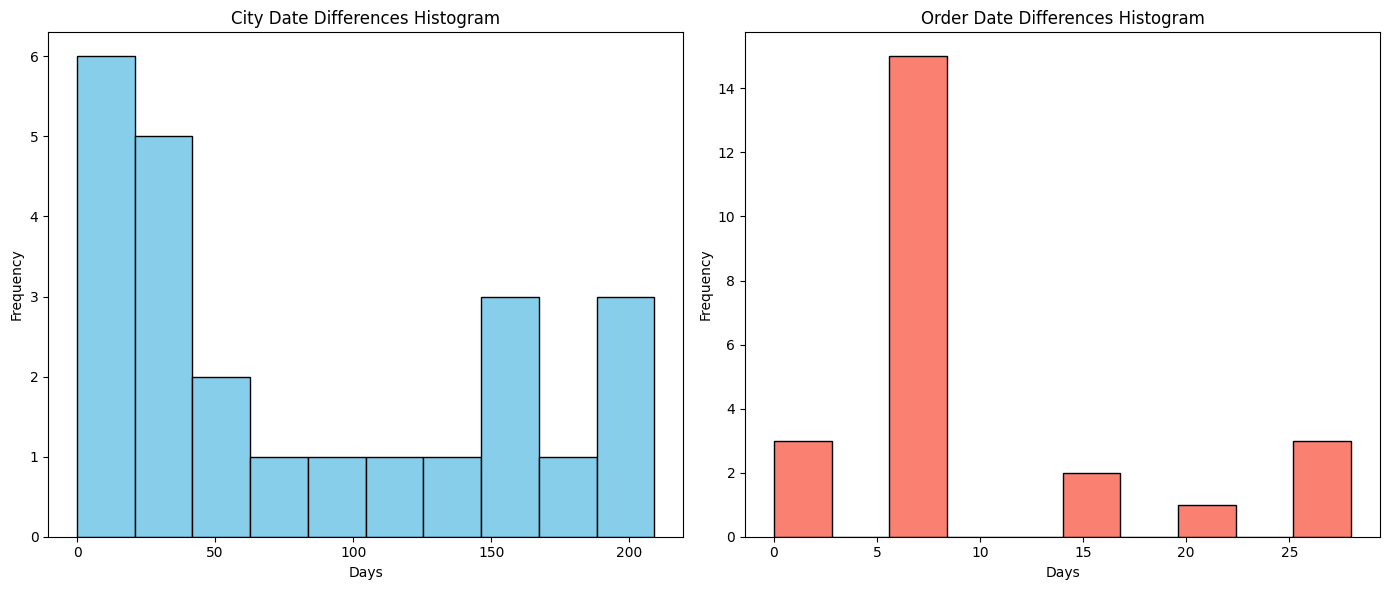

In [79]:
import matplotlib.pyplot as plt
import numpy as np

original_dates = {city: datetime.strptime(date, "%Y-%m-%d") for city, date in original_schedule.items()}
optimal_dates = {city: datetime.strptime(date, "%Y-%m-%d") for city, date in optimal_schedule.items()}

city_date_differences = [
    abs((optimal_dates[city] - original_dates[city]).days)
    for city in original_schedule if city in optimal_schedule
]

original_order_dates = list(original_dates.values())
optimal_order_dates = list(optimal_dates.values())
order_date_differences = [
    abs((optimal_order_dates[i] - original_order_dates[i]).days)
    for i in range(len(original_order_dates))
]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(city_date_differences, bins=10, edgecolor='black', color='skyblue')
plt.title('City Date Differences Histogram')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(order_date_differences, bins=10, edgecolor='black', color='salmon')
plt.title('Order Date Differences Histogram')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Integrations of train

In [80]:
truck_km = pd.read_csv('https://raw.githubusercontent.com/AntoineTrabia/LogisticsProject/main/truck_km.csv', index_col=0)

In [81]:
european_gps = ['Imola', 'Monaco', 'Barcelona', 'Spielberg', 'Budapest', 'Spa Francorchamps', 'Zandvoort', 'Monza']
Emissions_by_train = 0
distance = 0
new_emissions = {}
truck_emissions = 0
train_emissions = 0
for start, end, transport, co2, time in transport_decisions:
    if transport != "none":
      if start in european_gps and end in european_gps:
        distance = truck_km.at[start, end]
        truck_emissions += co2_truck.at[start, end]
        print(f"{start} => {end} by {transport} (CO2: {co2/1000:.2f} tonnes, Time: {time} hours, Distance: {distance} km)")
        Emissions_by_train = 36 * distance  # Train emits 36 kgCO2/km when transporting all the equipment
        train_emissions += Emissions_by_train
        new_emissions[(start,end)] = Emissions_by_train
        print(f'Emissions by Train: {Emissions_by_train:0.2f} tonnes')
    else:
        print(f"No suitable transport found from {start} to {end} that meets the time constraint of 240 hours.")

Zandvoort => Spa Francorchamps by truck (CO2: 63.78 tonnes, Time: 3.45 hours, Distance: 310.34 km)
Emissions by Train: 11172.24 tonnes
Spa Francorchamps => Barcelona by truck (CO2: 274.22 tonnes, Time: 14.83 hours, Distance: 1334.4 km)
Emissions by Train: 48038.40 tonnes
Barcelona => Monaco by truck (CO2: 129.99 tonnes, Time: 7.03 hours, Distance: 632.54 km)
Emissions by Train: 22771.44 tonnes
Monaco => Monza by truck (CO2: 68.39 tonnes, Time: 3.7 hours, Distance: 332.78 km)
Emissions by Train: 11980.08 tonnes
Monza => Imola by truck (CO2: 63.54 tonnes, Time: 3.44 hours, Distance: 309.19 km)
Emissions by Train: 11130.84 tonnes
Imola => Spielberg by truck (CO2: 106.36 tonnes, Time: 5.75 hours, Distance: 517.57 km)
Emissions by Train: 18632.52 tonnes
Spielberg => Budapest by truck (CO2: 90.87 tonnes, Time: 4.91 hours, Distance: 442.21 km)
Emissions by Train: 15919.56 tonnes


In [82]:
print(f'Using the truck in Europe emits {truck_emissions/1000:0.0f} tonnes of CO2')
print(f'Using the train in Europe emits {train_emissions/1000:0.0f} tonnes of CO2')
Improvement_train_truck = (truck_emissions-train_emissions)/truck_emissions*100
print(f'Train reduces emissions in europe by {Improvement_train_truck:0.0f}%')
print(f'{(truck_emissions - train_emissions)/1000:0.0f}')

Using the truck in Europe emits 797 tonnes of CO2
Using the train in Europe emits 140 tonnes of CO2
Train reduces emissions in europe by 82%
657


In [83]:
transport_decisions_with_train = []

for trip in transport_decisions:
    start, end, transport, emissions, time = trip
    if (start, end) in new_emissions:
        transport_decisions_with_train.append((start, end, 'train', new_emissions[(start, end)], time))
    else:
        transport_decisions_with_train.append(trip)

transport_decisions_with_train

[('Melbourne', 'Singapore', 'ship', 69968.76, 222.12),
 ('Singapore', 'Shanghai', 'ship', 43968.71, 139.58),
 ('Shanghai', 'Suzuka', 'ship', 17064.19, 54.17),
 ('Suzuka', 'Las Vegas', 'plane', 14274873.06, 10.81),
 ('Las Vegas', 'Austin', 'ship', 29564.8, 93.86),
 ('Austin', 'Mexico City', 'ship', 13888.37, 44.09),
 ('Mexico City', 'Sao Paulo', 'truck', 1985160.39, 107.33),
 ('Sao Paulo', 'Miami', 'plane', 10250351.83, 7.76),
 ('Miami', 'Montreal', 'ship', 26039.23, 82.66),
 ('Montreal', 'Silverstone', 'ship', 59335.08, 188.37),
 ('Silverstone', 'Zandvoort', 'ship', 4389.83, 13.94),
 ('Zandvoort', 'Spa Francorchamps', 'train', 11172.24, 3.45),
 ('Spa Francorchamps', 'Barcelona', 'train', 48038.4, 14.83),
 ('Barcelona', 'Monaco', 'train', 22771.44, 7.03),
 ('Monaco', 'Monza', 'train', 11980.079999999998, 3.7),
 ('Monza', 'Imola', 'train', 11130.84, 3.44),
 ('Imola', 'Spielberg', 'train', 18632.52, 5.75),
 ('Spielberg', 'Budapest', 'train', 15919.56, 4.91),
 ('Budapest', 'Baku', 'truck',

In [84]:
total_emissions = sum(trip[3] for trip in transport_decisions_with_train)/1000
total_emissions_boat = total_emissions + (co2_boat.at['Silverstone', 'Melbourne'] + co2_boat.at['Yas Marina', 'Silverstone'])/1000
total_emissions_plane = total_emissions + (co2_plane.at['Silverstone', 'Melbourne'] + co2_plane.at['Yas Marina', 'Silverstone'])/1000

print(f'Total CO2 emissions with train & boat: {total_emissions_boat:.0f} tonnes of CO2')
print(f"Total CO2 emitted with truck & boat: {total_co2_depot_tonnes:0.0f} tonnes of CO2")
print(f'Total CO2 emissions with train & plane: {total_emissions_plane:.0f} tonnes of CO2')
print(f'Total CO2 emissions with truck & plane: {total_co2_depot_plane_tonnes:.0f} tonnes of CO2')

improvement_boat = (total_co2_depot_tonnes-total_emissions_boat)/total_co2_depot_tonnes*100
print(f"Improvement with boat & train: {improvement_boat:0.0f}%")

improvement_plane = (total_co2_depot_plane_tonnes-total_emissions_plane)/total_co2_depot_plane_tonnes*100
print(f"Improvement with plane & train: {improvement_plane:0.0f}%")

Total CO2 emissions with train & boat: 28591 tonnes of CO2
Total CO2 emitted with truck & boat: 29249 tonnes of CO2
Total CO2 emissions with train & plane: 63220 tonnes of CO2
Total CO2 emissions with truck & plane: 63878 tonnes of CO2
Improvement with boat & train: 2%
Improvement with plane & train: 1%
